In [1]:
import pandas as pd 
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from IPython.display import display

# I. Exploratoring Data Analysis

In [3]:
train_data = {}
for i in range(2019,2024):
    train_data[i] = pd.read_parquet(f"train_{i}.parquet")
    print(f"Train data of year {i}:")
    display(train_data[i].head())

Train data of year 2019:


Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-29   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-30   
2    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-05   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-06   
4    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-07   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...         64.883707   
1                0                 0  ...         78.677836   
2                0                 0  ...        165.551233   
3                0                 0  ...        145.442583   
4                0                 0  ...        134.479979   

   crypto_out_volume  complaints               touchpoints  \
0          25.816780           0  [phone, phone, whatsapp]   
1          20.126142           0                        []   
2          44.611071           0                        []   
3          48.239808           0                        []   
4          40.964591           0                        []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    4273            False   
1  {'appointment': None, 'email': None, 'phone': ...    4274            False   
2  {'appointment': None, 'email': None, 'phone': ...    4065            False   
3  {'appointment': None, 'email': None, 'phone': ...    4066            False   
4  {'appointment': None, 'email': None, 'phone': ...    4067            False   

                                   job  churn_due_to_fraud  \
0               Amenity horticulturist               False   
1               Amenity horticulturist               False   
2  Engineer, broadcasting (operations)               False   
3  Engineer, broadcasting (operations)               False   
4  Engineer, broadcasting (operations)               False   

  model_predicted_fraud  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 26 columns]

Train data of year 2020:


Id  customer_id  interest_rate              name      country  \
0  3080797            1            0.0    Yolanda Parker    Lithuania   
1  2921297            3            0.0  Michael Mcknight      Romania   
2  2922045            3            0.0  Michael Mcknight      Romania   
3  2923573            3            0.0  Michael Mcknight      Romania   
4  3108187            5            0.0       Emily Solis  Netherlands   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2020-10-10   
1    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2020-03-20   
2    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2020-03-21   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2020-03-23   
4    2006-06-30  664 Brown Rapid\nBrianburgh, MN 10337 Netherlands 2020-11-13   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...             397.0   
1                0                 0  ...              47.0   
2                0                 0  ...              47.0   
3                0                 0  ...              47.0   
4                0                 0  ...              45.0   

   crypto_out_volume  complaints  touchpoints  \
0              215.0           0           []   
1               15.0           0           []   
2               15.0           0           []   
3               15.0           0           []   
4               13.0           0           []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    4650            False   
1  {'appointment': None, 'email': None, 'phone': ...    4446            False   
2  {'appointment': None, 'email': None, 'phone': ...    4447            False   
3  {'appointment': None, 'email': None, 'phone': ...    4449            False   
4  {'appointment': None, 'email': None, 'phone': ...    4684            False   

                                   job  churn_due_to_fraud  \
0               Amenity horticulturist               False   
1  Engineer, broadcasting (operations)               False   
2  Engineer, broadcasting (operations)               False   
3  Engineer, broadcasting (operations)               False   
4               Occupational hygienist               False   

  model_predicted_fraud  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 26 columns]

Train data of year 2021:


Id  customer_id  interest_rate            name    country  \
0  3389335            1            0.0  Yolanda Parker  Lithuania   
1  3390207            1            0.0  Yolanda Parker  Lithuania   
2  3391070            1            0.0  Yolanda Parker  Lithuania   
3  3391930            1            0.0  Yolanda Parker  Lithuania   
4  3392777            1            0.0  Yolanda Parker  Lithuania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2021-10-16   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2021-10-17   
2    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2021-10-18   
3    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2021-10-19   
4    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2021-10-20   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...         77.097244   
1                0                 0  ...         75.915304   
2                0                 0  ...         86.670872   
3                0                 0  ...         91.215423   
4                0                 0  ...         80.986846   

   crypto_out_volume  complaints                     touchpoints  \
0          22.843025           0                              []   
1          24.014418           0                              []   
2          24.131977           0                              []   
3          29.003817           0                              []   
4          25.900938           0  [appointment, whatsapp, email]   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    5021            False   
1  {'appointment': None, 'email': None, 'phone': ...    5022            False   
2  {'appointment': None, 'email': None, 'phone': ...    5023            False   
3  {'appointment': None, 'email': None, 'phone': ...    5024            False   
4  {'appointment': None, 'email': None, 'phone': ...    5025            False   

                      job  churn_due_to_fraud model_predicted_fraud  
0  Amenity horticulturist               False                 False  
1  Amenity horticulturist               False                 False  
2  Amenity horticulturist               False                 False  
3  Amenity horticulturist               False                 False  
4  Amenity horticulturist               False                 False  

[5 rows x 26 columns]

Train data of year 2022:


Id  customer_id  interest_rate              name    country  \
0  3790639            1            0.0    Yolanda Parker  Lithuania   
1  3791762            1            0.0    Yolanda Parker  Lithuania   
2  3792906            1            0.0    Yolanda Parker  Lithuania   
3  3580604            3            0.0  Michael Mcknight    Romania   
4  3581726            3            0.0  Michael Mcknight    Romania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2022-10-26   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2022-10-27   
2    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2022-10-28   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2022-04-25   
4    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2022-04-26   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...        273.739825   
1                0                 0  ...        243.029802   
2                0                 0  ...        213.381624   
3                0                 0  ...       1588.416813   
4                0                 0  ...       1264.841644   

   crypto_out_volume  complaints  touchpoints  \
0          40.873563           0           []   
1          35.051230           0           []   
2          35.726898           0           []   
3         828.361600           0           []   
4        1023.830243           0   [whatsapp]   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    5396            False   
1  {'appointment': None, 'email': None, 'phone': ...    5397            False   
2  {'appointment': None, 'email': None, 'phone': ...    5398            False   
3  {'appointment': None, 'email': None, 'phone': ...    5212            False   
4  {'appointment': None, 'email': None, 'phone': ...    5213            False   

                                   job  churn_due_to_fraud  \
0               Amenity horticulturist               False   
1               Amenity horticulturist               False   
2               Amenity horticulturist               False   
3  Engineer, broadcasting (operations)               False   
4  Engineer, broadcasting (operations)               False   

  model_predicted_fraud  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 26 columns]

Train data of year 2023:


Id  customer_id  interest_rate         name      country  \
0  3868940            5            2.5  Emily Solis  Netherlands   
1  3870140            5            2.5  Emily Solis  Netherlands   
2  3871324            5            2.5  Emily Solis  Netherlands   
3  3872515            5            2.5  Emily Solis  Netherlands   
4  3873696            5            2.5  Emily Solis  Netherlands   

  date_of_birth                                            address       date  \
0    2006-06-30  664 Brown Rapid\nBrianburgh, MN 10337 Netherlands 2023-01-01   
1    2006-06-30  664 Brown Rapid\nBrianburgh, MN 10337 Netherlands 2023-01-02   
2    2006-06-30  664 Brown Rapid\nBrianburgh, MN 10337 Netherlands 2023-01-03   
3    2006-06-30  664 Brown Rapid\nBrianburgh, MN 10337 Netherlands 2023-01-04   
4    2006-06-30  664 Brown Rapid\nBrianburgh, MN 10337 Netherlands 2023-01-05   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...        179.001527   
1                0                 0  ...        178.277805   
2                0                 0  ...        156.228806   
3                0                 0  ...        153.801324   
4                0                 0  ...        172.491017   

   crypto_out_volume  complaints              touchpoints  \
0          64.326489           0                       []   
1          64.081651           0                       []   
2          62.867531           0  [appointment, whatsapp]   
3          65.039384           0                       []   
4          54.875766           0                       []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    5463            False   
1  {'appointment': None, 'email': None, 'phone': ...    5464            False   
2  {'appointment': None, 'email': None, 'phone': ...    5465            False   
3  {'appointment': None, 'email': None, 'phone': ...    5466            False   
4  {'appointment': None, 'email': None, 'phone': ...    5467            False   

                      job  churn_due_to_fraud model_predicted_fraud  
0  Occupational hygienist               False                 False  
1  Occupational hygienist               False                 False  
2  Occupational hygienist               False                 False  
3  Occupational hygienist               False                 False  
4  Occupational hygienist               False                 False  

[5 rows x 26 columns]

In [4]:
test_data = pd.read_parquet("test.parquet")
test_data.head()

Id  customer_id  interest_rate                name         country  \
0  6187320        68714            3.0   Shannon Rodriguez         Belgium   
1  6187321        90102            3.0  Michael Hutchinson  Czech Republic   
2  6187322       106090            3.0        Lisa Johnson       Lithuania   
3  6187323        90092            3.0    Kimberly Bennett         Austria   
4  6187324        90083            3.0    Holly Perkins MD         Belgium   

  date_of_birth                                            address       date  \
0    1988-02-03  68295 Young Cliff Suite 989\nWilsonland, NC 46... 2024-01-01   
1    1968-08-01           USCGC Knapp\nFPO AA 87355 Czech Republic 2024-01-01   
2    1970-04-10  1768 Timothy Common\nSouth Kyleborough, SD 872... 2024-01-01   
3    1942-11-28  7518 David River\nWest Stevenborough, AL 26963... 2024-01-01   
4    1971-09-11  6667 Laura Motorway Apt. 513\nOrtizhaven, PA 4... 2024-01-01   

   atm_transfer_in  atm_transfer_out  ...  crypto_out_volume  complaints  \
0                0                 0  ...          20.922171           0   
1                0                 0  ...           1.802211           0   
2                0                 0  ...          11.712590           0   
3                0                 0  ...          15.850617           0   
4                0                 0  ...         245.976563           2   

                      touchpoints  \
0  [whatsapp, whatsapp, whatsapp]   
1                              []   
2                              []   
3                              []   
4                              []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    1122            False   
1  {'appointment': None, 'email': None, 'phone': ...     399            False   
2  {'appointment': None, 'email': None, 'phone': ...       3            False   
3  {'appointment': None, 'email': None, 'phone': ...     400            False   
4  {'appointment': None, 'email': None, 'phone': ...     400            False   

                         job  churn_due_to_fraud    Usage  \
0  Psychologist, educational               False  Private   
1      Forensic psychologist               False  Private   
2    General practice doctor               False  Private   
3         Surveyor, quantity               False  Private   
4       Intelligence analyst               False  Private   

  model_predicted_fraud  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 27 columns]

In [5]:
for key, value in train_data.items():
    print(f"Data from year {key}:")
    print(value.info())

Data from year 2019:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533065 entries, 0 to 533064
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Id                        533065 non-null  int64         
 1   customer_id               533065 non-null  int64         
 2   interest_rate             533065 non-null  float64       
 3   name                      533065 non-null  object        
 4   country                   533065 non-null  object        
 5   date_of_birth             533065 non-null  object        
 6   address                   533065 non-null  object        
 7   date                      533065 non-null  datetime64[ns]
 8   atm_transfer_in           533065 non-null  int64         
 9   atm_transfer_out          533065 non-null  int64         
 10  bank_transfer_in          533065 non-null  int64         
 11  bank_transfer_out         533065 non-null  i

### Files
- train_YEAR.parquet - the training data split by year
- test.parquet - the test set
- sample_submission.csv - a sample submission file in the correct format
### Columns
- Id - unique id of this daily table
- customer_id - unique customer_id
- interest_rate - bank account interest rate on that day
- name - name of the person
- country - country of the person
- date_of_birth - date of birth of the person
- address - current address of the person
- date - date of the events
- atm_transfer_in - number of ATM pay-ins
- atm_transfer_out - number of ATM withdrawals
- bank_transfer_in - number of in-going transactions
- bank_transfer_out - number of out-going transactions
- crypto_in - number of buying-crypto transactions
- crypto_out - number of selling-crypto transactions
- bank_transfer_in_volume - total volume of in-going transactions
- bank_transfer_out_volume - total volume of out-going transactions
- crypto_in_volume - total volume of buying-crypto transactions
- crypto_out_volume - total volume of selling-crypto transactions
- churn - Flag if customer will not do any action anymore in the next 12 months (TARGET COLUMN)
- complaints - number of complaints made
- touchpoints - list of support touchpoints the customer had that day (the list contains the channel name the customer reached out via)
- csat_scores - customer satisfaction score the customer gave based on the support touchpoint. Nested dictionary with CSAT by support channel.
- tenure - days since the customer signed a contract with the bank or had a product activity first time
- from_competitor - flag indicating if customer came from competitor
- job - customer's job title

In [7]:
for key, value in train_data.items():
    print(f"Data from year {key}:")
    print(value.isnull().sum())

Data from year 2019:
Id                          0
customer_id                 0
interest_rate               0
name                        0
country                     0
date_of_birth               0
address                     0
date                        0
atm_transfer_in             0
atm_transfer_out            0
bank_transfer_in            0
bank_transfer_out           0
crypto_in                   0
crypto_out                  0
bank_transfer_in_volume     0
bank_transfer_out_volume    0
crypto_in_volume            0
crypto_out_volume           0
complaints                  0
touchpoints                 0
csat_scores                 0
tenure                      0
from_competitor             0
job                         0
churn_due_to_fraud          0
model_predicted_fraud       0
dtype: int64
Data from year 2020:
Id                          0
customer_id                 0
interest_rate               0
name                        0
country                     0
date_of_birth  

In [8]:
train_data[2019].columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [9]:
test_data.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'Usage', 'model_predicted_fraud'],
      dtype='object')

In [10]:
df = pd.concat([train_data[2019], train_data[2020], train_data[2021], train_data[2022], train_data[2023]], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 26 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

Convert `date_of_birth` to datetime type

In [12]:
df.head()

Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-29   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-30   
2    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-05   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-06   
4    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-07   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...         64.883707   
1                0                 0  ...         78.677836   
2                0                 0  ...        165.551233   
3                0                 0  ...        145.442583   
4                0                 0  ...        134.479979   

   crypto_out_volume  complaints               touchpoints  \
0          25.816780           0  [phone, phone, whatsapp]   
1          20.126142           0                        []   
2          44.611071           0                        []   
3          48.239808           0                        []   
4          40.964591           0                        []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    4273            False   
1  {'appointment': None, 'email': None, 'phone': ...    4274            False   
2  {'appointment': None, 'email': None, 'phone': ...    4065            False   
3  {'appointment': None, 'email': None, 'phone': ...    4066            False   
4  {'appointment': None, 'email': None, 'phone': ...    4067            False   

                                   job  churn_due_to_fraud  \
0               Amenity horticulturist               False   
1               Amenity horticulturist               False   
2  Engineer, broadcasting (operations)               False   
3  Engineer, broadcasting (operations)               False   
4  Engineer, broadcasting (operations)               False   

  model_predicted_fraud  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 26 columns]

In [13]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 26 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             datetime64[ns]
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

In [14]:
bool_col = []
print(f'Boolean type columns in dataset:')
for col in list(df.columns):
    if df[col].dtype == 'bool':
        print(col, end=', ')
        bool_col.append(col)

Boolean type columns in dataset:
from_competitor, churn_due_to_fraud, model_predicted_fraud, 

Transfrom boolean value to int value according to this rule: 0 for `False` and 1 for `True`

In [16]:
for col in bool_col:
    df[col] = [int(val) for val in df[col]]
display(df.head())
print(df.info())

Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-29   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-30   
2    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-05   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-06   
4    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-07   

   atm_transfer_in  atm_transfer_out  ...  crypto_in_volume  \
0                0                 0  ...         64.883707   
1                0                 0  ...         78.677836   
2                0                 0  ...        165.551233   
3                0                 0  ...        145.442583   
4                0                 0  ...        134.479979   

   crypto_out_volume  complaints               touchpoints  \
0          25.816780           0  [phone, phone, whatsapp]   
1          20.126142           0                        []   
2          44.611071           0                        []   
3          48.239808           0                        []   
4          40.964591           0                        []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    4273                0   
1  {'appointment': None, 'email': None, 'phone': ...    4274                0   
2  {'appointment': None, 'email': None, 'phone': ...    4065                0   
3  {'appointment': None, 'email': None, 'phone': ...    4066                0   
4  {'appointment': None, 'email': None, 'phone': ...    4067                0   

                                   job  churn_due_to_fraud  \
0               Amenity horticulturist                   0   
1               Amenity horticulturist                   0   
2  Engineer, broadcasting (operations)                   0   
3  Engineer, broadcasting (operations)                   0   
4  Engineer, broadcasting (operations)                   0   

  model_predicted_fraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 26 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 26 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             datetime64[ns]
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

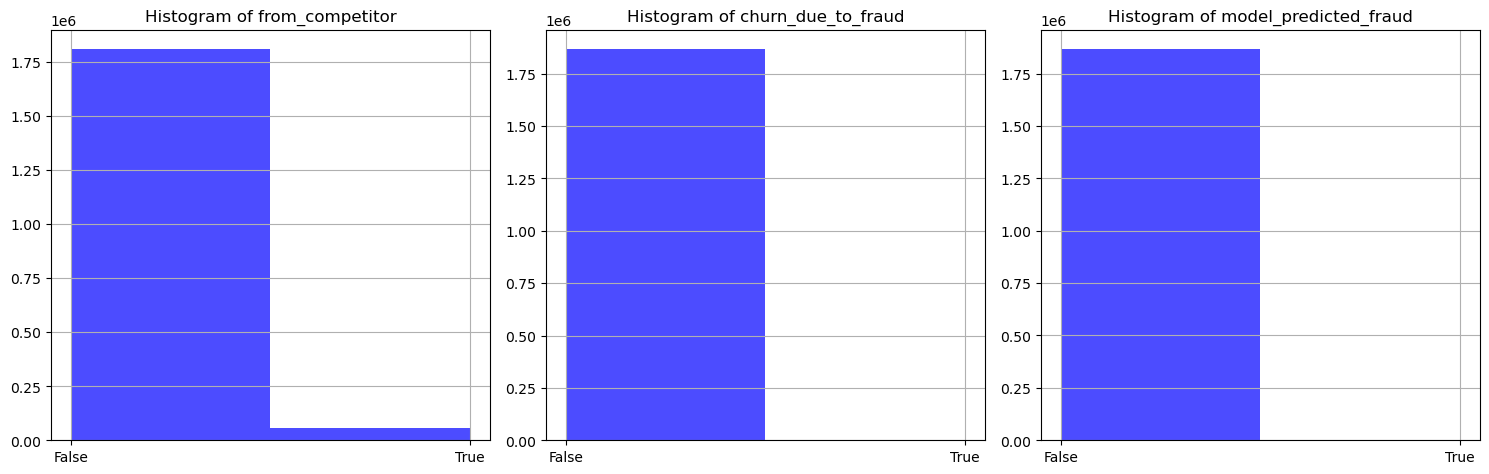

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot histograms
for i, col in enumerate(bool_col):  # Take only the first 3 boolean columns
    df[col].hist(bins=2, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xticks([0, 1])  # Ensure ticks are only 0 and 1
    axes[i].set_xticklabels(['False', 'True'])
plt.tight_layout()
plt.show()

In [18]:
object_col = []
print(f'Object type columns in dataset:')
for col in list(df.columns):
    if df[col].dtype == 'object':
        print(col, end=', ')
        object_col.append(col)

Object type columns in dataset:
name, country, address, touchpoints, csat_scores, job, 

In [19]:
df[object_col].head(10)

name    country  \
0    Yolanda Parker  Lithuania   
1    Yolanda Parker  Lithuania   
2  Michael Mcknight    Romania   
3  Michael Mcknight    Romania   
4  Michael Mcknight    Romania   
5  Michael Mcknight    Romania   
6  Michael Mcknight    Romania   
7  Michael Mcknight    Romania   
8  Michael Mcknight    Romania   
9  Michael Mcknight    Romania   

                                             address  \
0  1929 Erin Lights Suite 709\nLake Michaelburgh,...   
1  1929 Erin Lights Suite 709\nLake Michaelburgh,...   
2  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
3  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
4  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
5  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
6  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
7  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
8  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   
9  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7...   

                      touchpoints  \
0        [phone, phone, whatsapp]   
1                              []   
2                              []   
3                              []   
4                              []   
5                              []   
6                              []   
7                              []   
8  [email, appointment, whatsapp]   
9                              []   

                                         csat_scores  \
0  {'appointment': None, 'email': None, 'phone': ...   
1  {'appointment': None, 'email': None, 'phone': ...   
2  {'appointment': None, 'email': None, 'phone': ...   
3  {'appointment': None, 'email': None, 'phone': ...   
4  {'appointment': None, 'email': None, 'phone': ...   
5  {'appointment': None, 'email': None, 'phone': ...   
6  {'appointment': None, 'email': None, 'phone': ...   
7  {'appointment': None, 'email': None, 'phone': ...   
8  {'appointment': None, 'email': None, 'phone': ...   
9  {'appointment': None, 'email': None, 'phone': ...   

                                   job  
0               Amenity horticulturist  
1               Amenity horticulturist  
2  Engineer, broadcasting (operations)  
3  Engineer, broadcasting (operations)  
4  Engineer, broadcasting (operations)  
5  Engineer, broadcasting (operations)  
6  Engineer, broadcasting (operations)  
7  Engineer, broadcasting (operations)  
8  Engineer, broadcasting (operations)  
9  Engineer, broadcasting (operations)

In [20]:
for col in object_col:
    print(f'Unique values of {col}:')
    unique_value = df[col].astype(str).unique()
    print(unique_value)  # Convert values to string
    print(f"In total, it has {len(unique_value)} values")

Unique values of name:
['Yolanda Parker' 'Michael Mcknight' 'Emily Solis' ... 'Kayla Vasquez'
 'Jessica Murphy' 'Joshua Pratt']
In total, it has 69796 values
Unique values of country:
['Lithuania' 'Romania' 'Netherlands' 'Hungary' 'Denmark' 'Bulgaria'
 'Italy' 'Switzerland' 'Norway' 'Czech Republic' 'Greece' 'Germany'
 'Latvia' 'Ireland' 'Belgium' 'Estonia' 'Austria' 'Spain' 'Slovakia'
 'France' 'Finland' 'Sweden' 'Portugal' 'Poland' 'USA']
In total, it has 25 values
Unique values of address:
['1929 Erin Lights Suite 709\nLake Michaelburgh, GU 16541 Lithuania'
 '36495 Travis Ranch Apt. 055\nJustinmouth, CO 75114 Romania'
 '664 Brown Rapid\nBrianburgh, MN 10337 Netherlands' ...
 '07730 Melissa Highway\nMichaelfurt, AR 77003 Czech Republic'
 '352 Sharon Burg\nVictorfurt, KS 47610 Greece'
 '55637 Deanna Cliffs Suite 385\nHodgestown, NH 72813 Hungary']
In total, it has 97283 values
Unique values of touchpoints:
["['phone' 'phone' 'whatsapp']" '[]' "['email' 'appointment' 'whatsapp']"
 "['p

According to this data, we have 4 channels to reach out to the customers: `phone`, `whatsapp`, `email`, `appointment`. All we need to do now is to seperate this 4 channels into columns to count touchpoints and write down csat_scores

In [22]:
touchpoints = ['phone','whatsapp','email','appointment']
def count_tp(df):
    for tp in touchpoints:
        tps = []
        for val in df['touchpoints']:
            tps.append(list(val).count(tp))
        df[f'touch_point_{tp}'] = tps
    df = df.drop(columns = 'touchpoints')
    return df
df = count_tp(df)
display(df.head())
print(df.info())

Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-29   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-30   
2    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-05   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-06   
4    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-07   

   atm_transfer_in  atm_transfer_out  ...  \
0                0                 0  ...   
1                0                 0  ...   
2                0                 0  ...   
3                0                 0  ...   
4                0                 0  ...   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    4273                0   
1  {'appointment': None, 'email': None, 'phone': ...    4274                0   
2  {'appointment': None, 'email': None, 'phone': ...    4065                0   
3  {'appointment': None, 'email': None, 'phone': ...    4066                0   
4  {'appointment': None, 'email': None, 'phone': ...    4067                0   

                                   job  churn_due_to_fraud  \
0               Amenity horticulturist                   0   
1               Amenity horticulturist                   0   
2  Engineer, broadcasting (operations)                   0   
3  Engineer, broadcasting (operations)                   0   
4  Engineer, broadcasting (operations)                   0   

   model_predicted_fraud  touch_point_phone  touch_point_whatsapp  \
0                      0                  2                     1   
1                      0                  0                     0   
2                      0                  0                     0   
3                      0                  0                     0   
4                      0                  0                     0   

   touch_point_email touch_point_appointment  
0                  0                       0  
1                  0                       0  
2                  0                       0  
3                  0                       0  
4                  0                       0  

[5 rows x 29 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 29 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             datetime64[ns]
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

In [23]:
def csat_score(df):
    for tp in touchpoints:
        scores = []
        for val in df['csat_scores']:
            scores.append(val[tp] if val[tp] is not None else 0)
        df[f'csat_score_{tp}'] = scores
    df = df.drop(columns = 'csat_scores')
    return df
df = csat_score(df)
display(df.head(10))
print(df.info())

Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   
5  2367008            3            0.0  Michael Mcknight    Romania   
6  2368611            3            0.0  Michael Mcknight    Romania   
7  2370190            3            0.0  Michael Mcknight    Romania   
8  2371776            3            0.0  Michael Mcknight    Romania   
9  2373372            3            0.0  Michael Mcknight    Romania   

  date_of_birth                                            address       date  \
0    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-29   
1    1954-07-10  1929 Erin Lights Suite 709\nLake Michaelburgh,... 2019-09-30   
2    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-05   
3    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-06   
4    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-07   
5    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-08   
6    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-09   
7    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-10   
8    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-11   
9    2002-11-09  36495 Travis Ranch Apt. 055\nJustinmouth, CO 7... 2019-03-12   

   atm_transfer_in  atm_transfer_out  ...  churn_due_to_fraud  \
0                0                 0  ...                   0   
1                0                 0  ...                   0   
2                0                 0  ...                   0   
3                0                 0  ...                   0   
4                0                 0  ...                   0   
5                0                 0  ...                   0   
6                0                 0  ...                   0   
7                0                 0  ...                   0   
8                0                 0  ...                   0   
9                0                 0  ...                   0   

   model_predicted_fraud  touch_point_phone  touch_point_whatsapp  \
0                      0                  2                     1   
1                      0                  0                     0   
2                      0                  0                     0   
3                      0                  0                     0   
4                      0                  0                     0   
5                      0                  0                     0   
6                      0                  0                     0   
7                      0                  0                     0   
8                      0                  0                     1   
9                      0                  0                     0   

   touch_point_email  touch_point_appointment  csat_score_phone  \
0                  0                        0               0.0   
1                  0                        0               0.0   
2                  0                        0               0.0   
3                  0                        0               0.0   
4                  0                        0               0.0   
5                  0                        0               0.0   
6                  0                        0               0.0   
7                  0                        0               0.0   
8                  1                        1               0.0   
9                  0                        0               0.0   

   csat_score_whatsapp  csat_score_email  csat_score_appointment  
0                  0.0               0.0             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 32 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             datetime64[ns]
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

Extract the address

In [25]:
# Use regex to extract parts of the address
df[['street_address', 'city', 'state', 'zip_code', 'country_1']] = df['address'].str.extract(
    r'^(.*)\n(.*),\s([A-Z]{2})\s(\d{5})\s(.+)$'
)

# Drop the original address column (optional)
df = df.drop(columns=['address','country_1','zip_code'])
display(df.head())
print(df.info())

Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   

  date_of_birth       date  atm_transfer_in  atm_transfer_out  \
0    1954-07-10 2019-09-29                0                 0   
1    1954-07-10 2019-09-30                0                 0   
2    2002-11-09 2019-03-05                0                 0   
3    2002-11-09 2019-03-06                0                 0   
4    2002-11-09 2019-03-07                0                 0   

   bank_transfer_in  ...  touch_point_whatsapp  touch_point_email  \
0                 3  ...                     1                  0   
1                 3  ...                     0                  0   
2               526  ...                     0                  0   
3               485  ...                     0                  0   
4               439  ...                     0                  0   

   touch_point_appointment  csat_score_phone  csat_score_whatsapp  \
0                        0               0.0                  0.0   
1                        0               0.0                  0.0   
2                        0               0.0                  0.0   
3                        0               0.0                  0.0   
4                        0               0.0                  0.0   

   csat_score_email  csat_score_appointment               street_address  \
0               0.0                     0.0   1929 Erin Lights Suite 709   
1               0.0                     0.0   1929 Erin Lights Suite 709   
2               0.0                     0.0  36495 Travis Ranch Apt. 055   
3               0.0                     0.0  36495 Travis Ranch Apt. 055   
4               0.0                     0.0  36495 Travis Ranch Apt. 055   

                city  state  
0  Lake Michaelburgh     GU  
1  Lake Michaelburgh     GU  
2        Justinmouth     CO  
3        Justinmouth     CO  
4        Justinmouth     CO  

[5 rows x 34 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 34 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             datetime64[ns]
 6   date                      datetime64[ns]
 7   atm_transfer_in           int64         
 8   atm_transfer_out          int64         
 9   bank_transfer_in          int64         
 10  bank_transfer_out         int64         
 11  crypto_in                 int64         
 12  crypto_out                int64         
 13  bank_transfer_in_volume   float64       
 14  bank_transfer_out_volume  float64       
 15  crypto_in_volume          float64       
 16  crypto_out_volume         float64       
 17  complain

In [26]:
object_col_2 = []
for col in list(df.columns):
    if df[col].dtype == 'object':
        object_col_2.append(col)
for col in object_col_2:
    print(f'Unique values of {col}:')
    unique_value = df[col].astype(str).unique()
    print(unique_value)  # Convert values to string
    print(f"In total, it has {len(unique_value)} values")

Unique values of name:
['Yolanda Parker' 'Michael Mcknight' 'Emily Solis' ... 'Kayla Vasquez'
 'Jessica Murphy' 'Joshua Pratt']
In total, it has 69796 values
Unique values of country:
['Lithuania' 'Romania' 'Netherlands' 'Hungary' 'Denmark' 'Bulgaria'
 'Italy' 'Switzerland' 'Norway' 'Czech Republic' 'Greece' 'Germany'
 'Latvia' 'Ireland' 'Belgium' 'Estonia' 'Austria' 'Spain' 'Slovakia'
 'France' 'Finland' 'Sweden' 'Portugal' 'Poland' 'USA']
In total, it has 25 values
Unique values of job:
['Amenity horticulturist' 'Engineer, broadcasting (operations)'
 'Occupational hygienist' 'Engineer, agricultural' 'Theatre manager'
 'Legal executive' 'Ranger/warden' 'Therapist, nutritional'
 'Radio broadcast assistant' 'Financial controller' 'Editorial assistant'
 'Chartered certified accountant' 'Scientist, water quality' 'Barrister'
 'Audiological scientist' 'Immigration officer' 'Restaurant manager'
 'Haematologist' 'Pharmacist, community'
 'Scientist, product/process development' 'Gaffer' 'Dram

House addresses aren't really necessary so we can exclude it

In [28]:
df = df.drop(columns = 'street_address')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867263 entries, 0 to 1867262
Data columns (total 33 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             datetime64[ns]
 6   date                      datetime64[ns]
 7   atm_transfer_in           int64         
 8   atm_transfer_out          int64         
 9   bank_transfer_in          int64         
 10  bank_transfer_out         int64         
 11  crypto_in                 int64         
 12  crypto_out                int64         
 13  bank_transfer_in_volume   float64       
 14  bank_transfer_out_volume  float64       
 15  crypto_in_volume          float64       
 16  crypto_out_volume         float64       
 17  complain

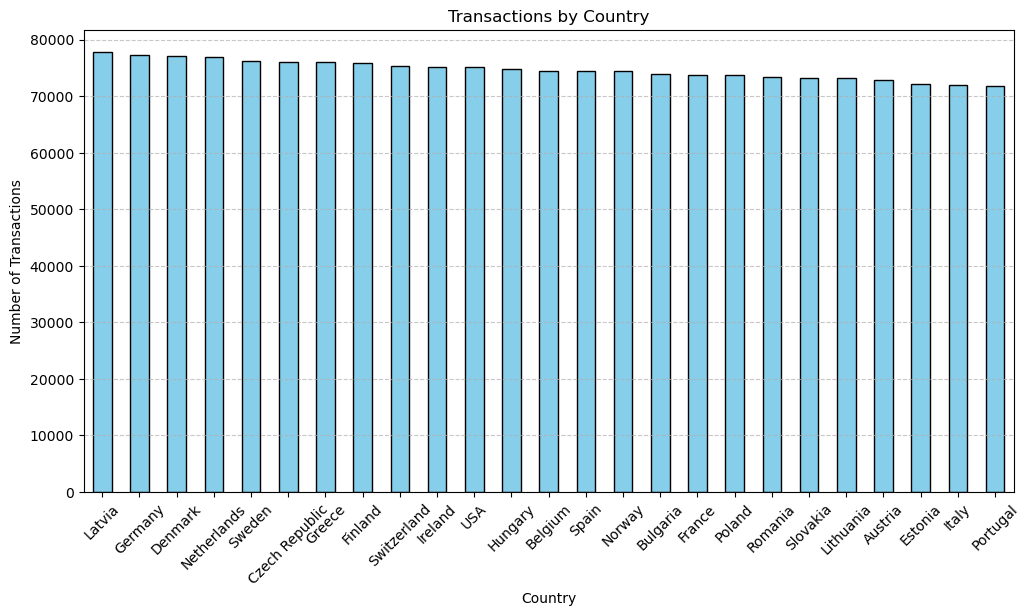

In [29]:
country_counts = df['country'].value_counts()
# Plot bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.title("Transactions by Country")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the chart
plt.show()

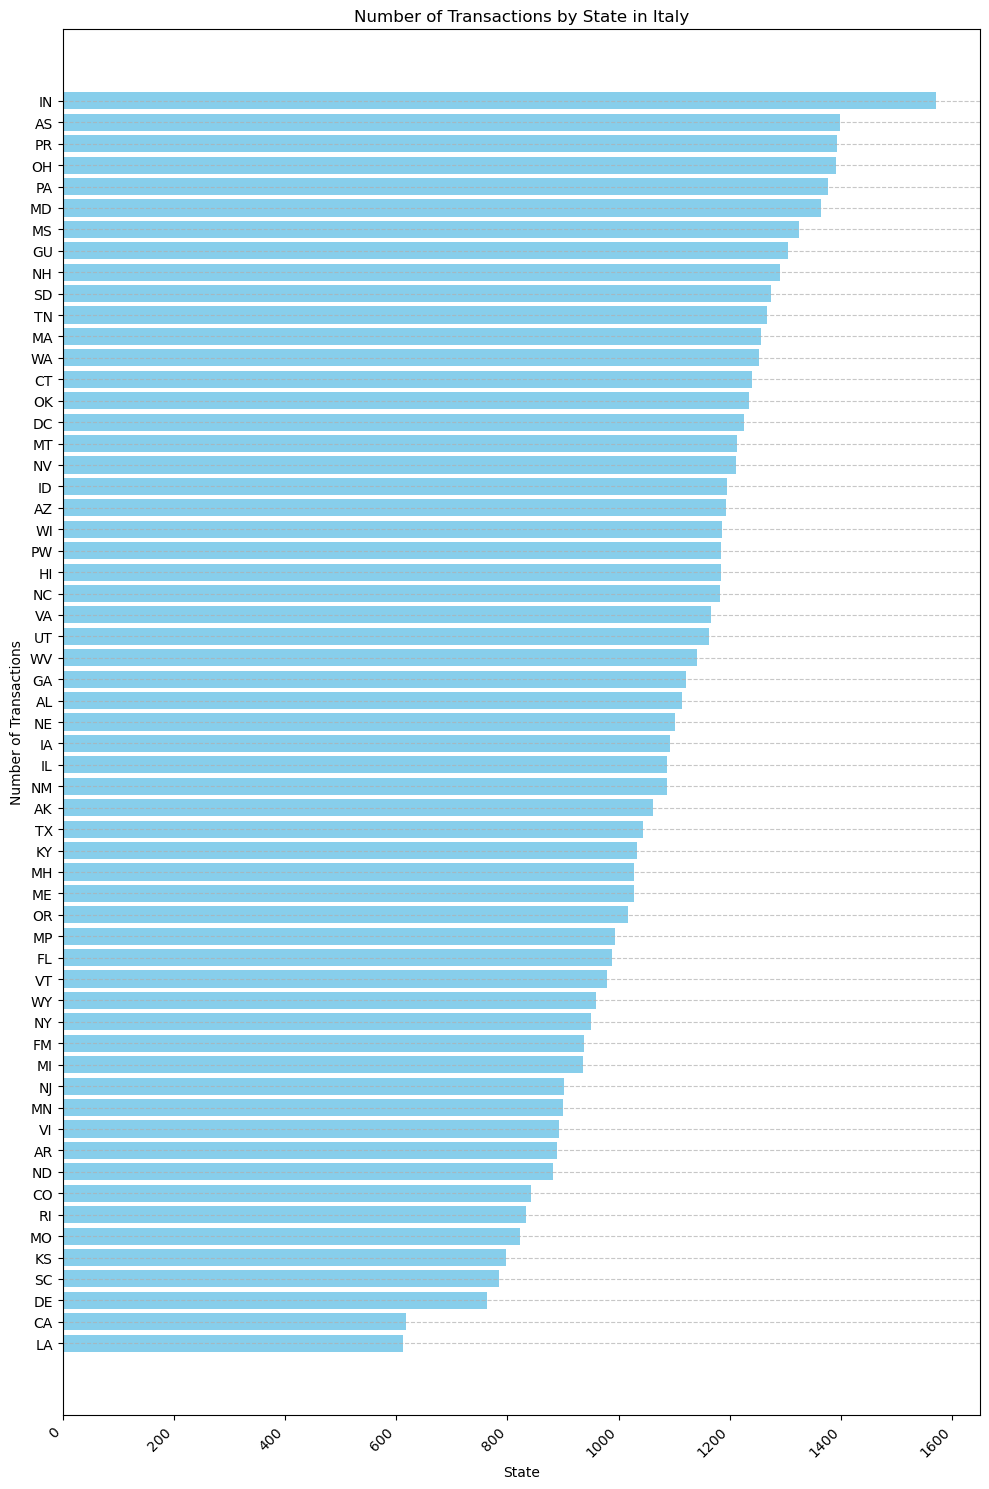

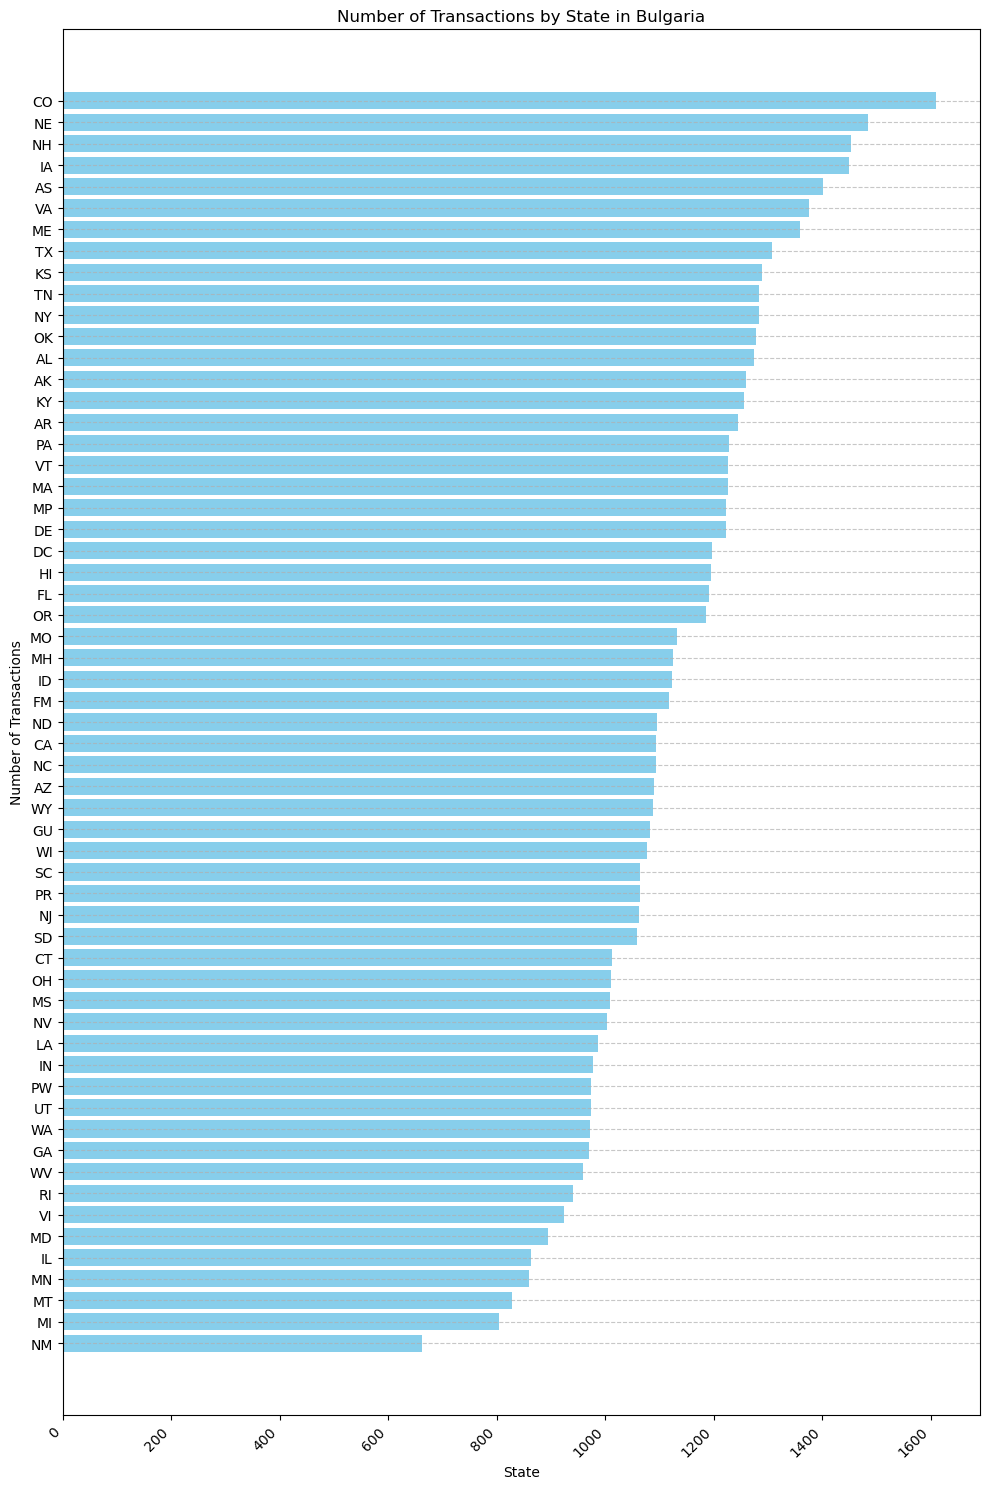

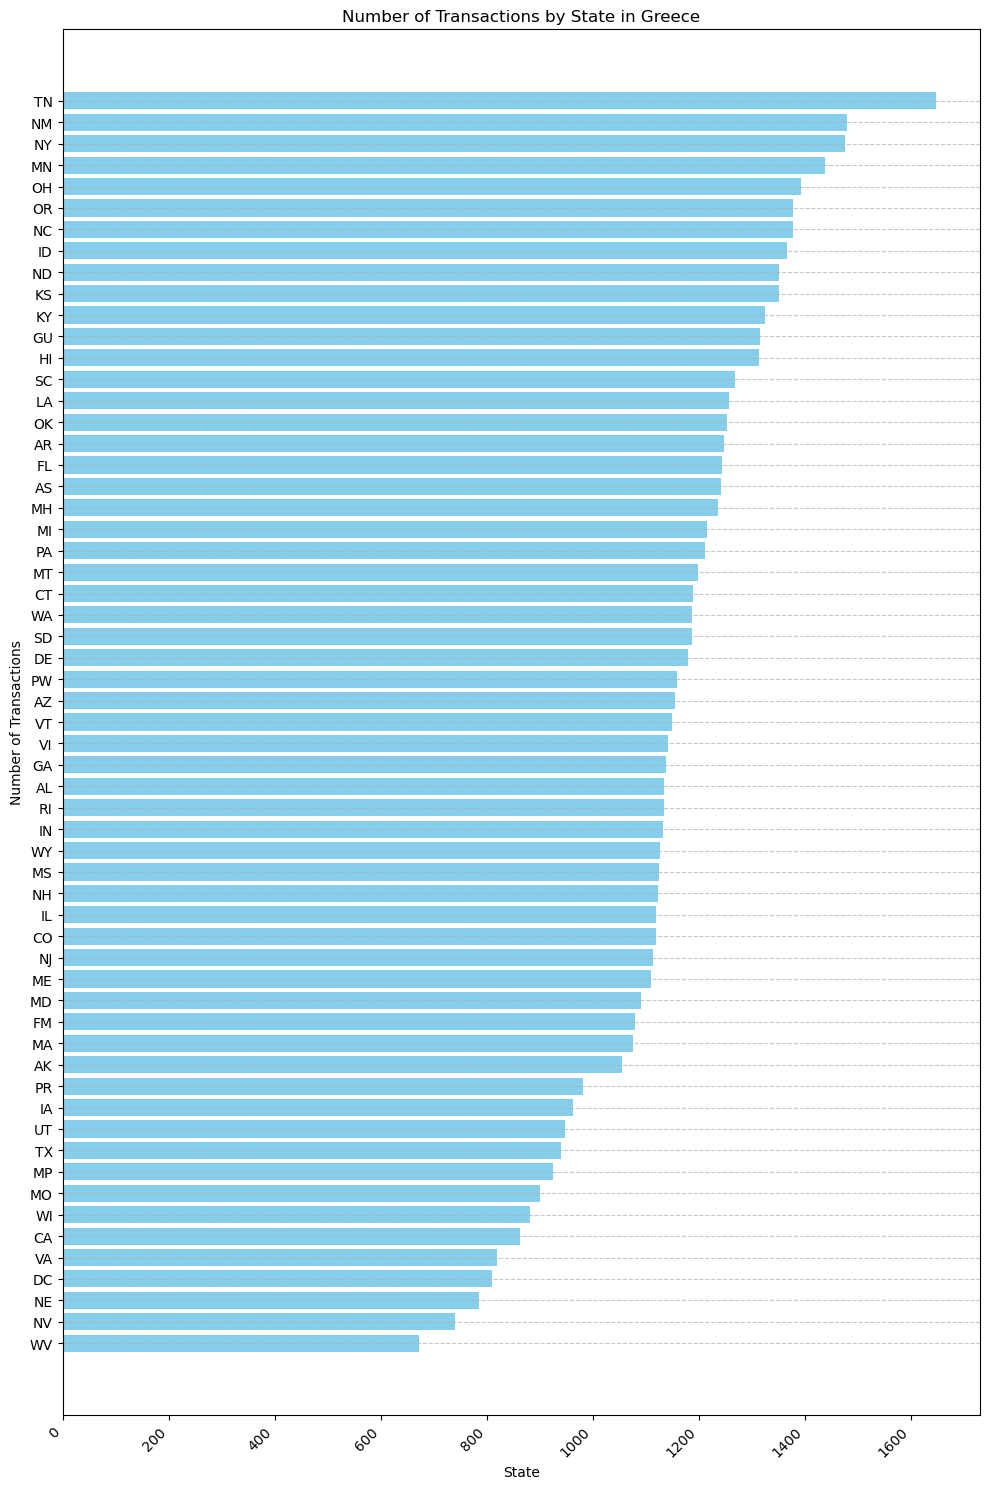

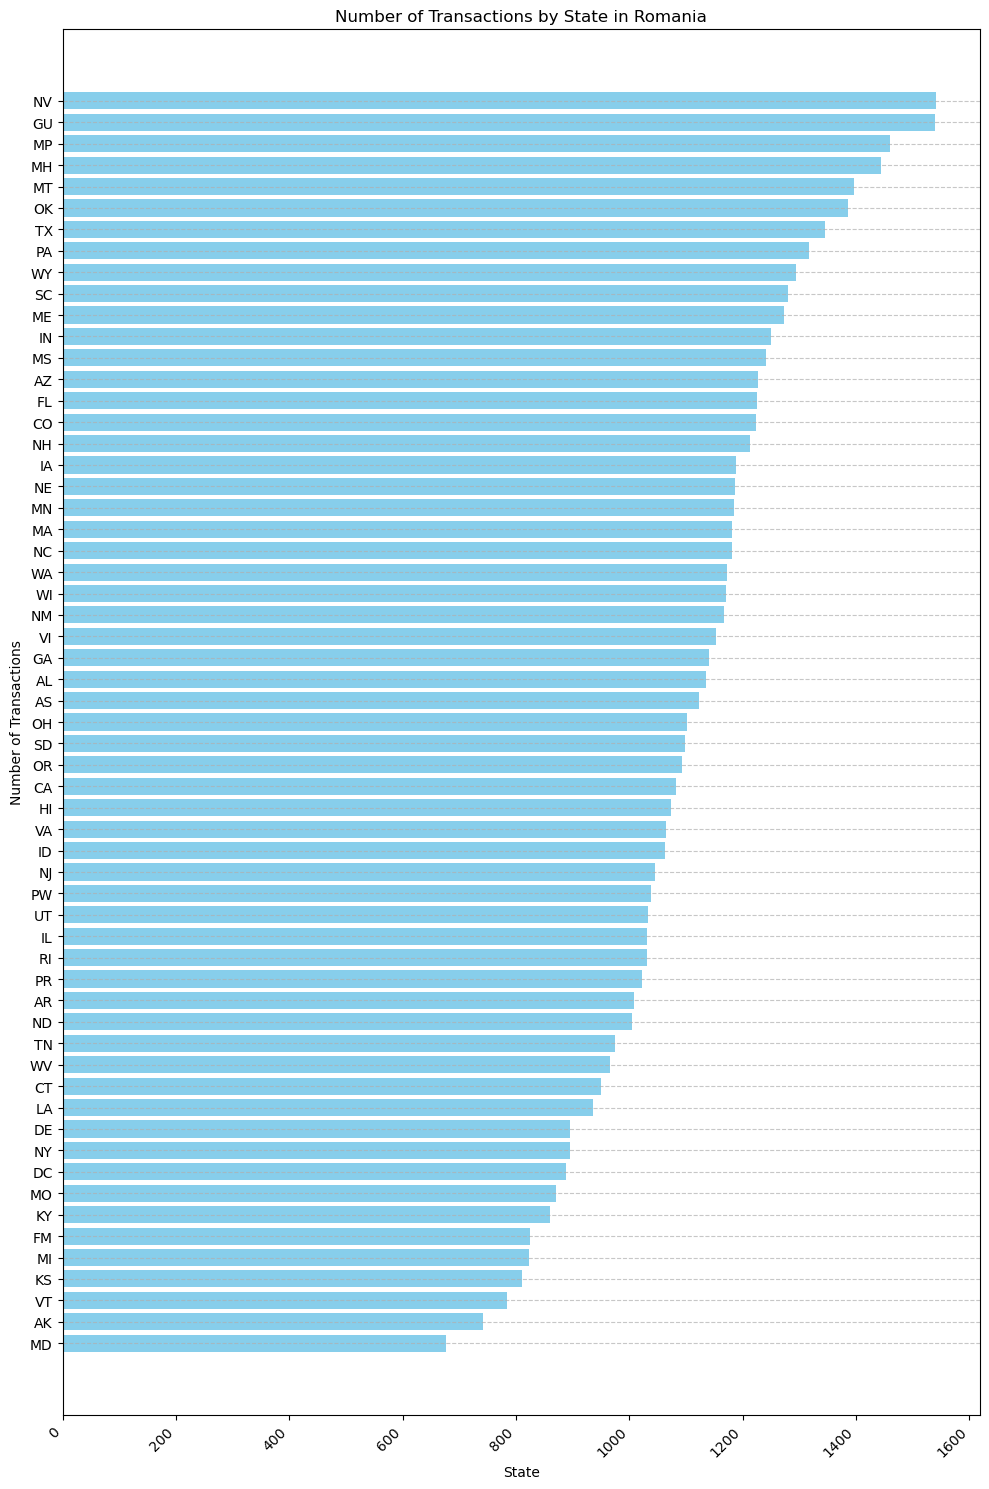

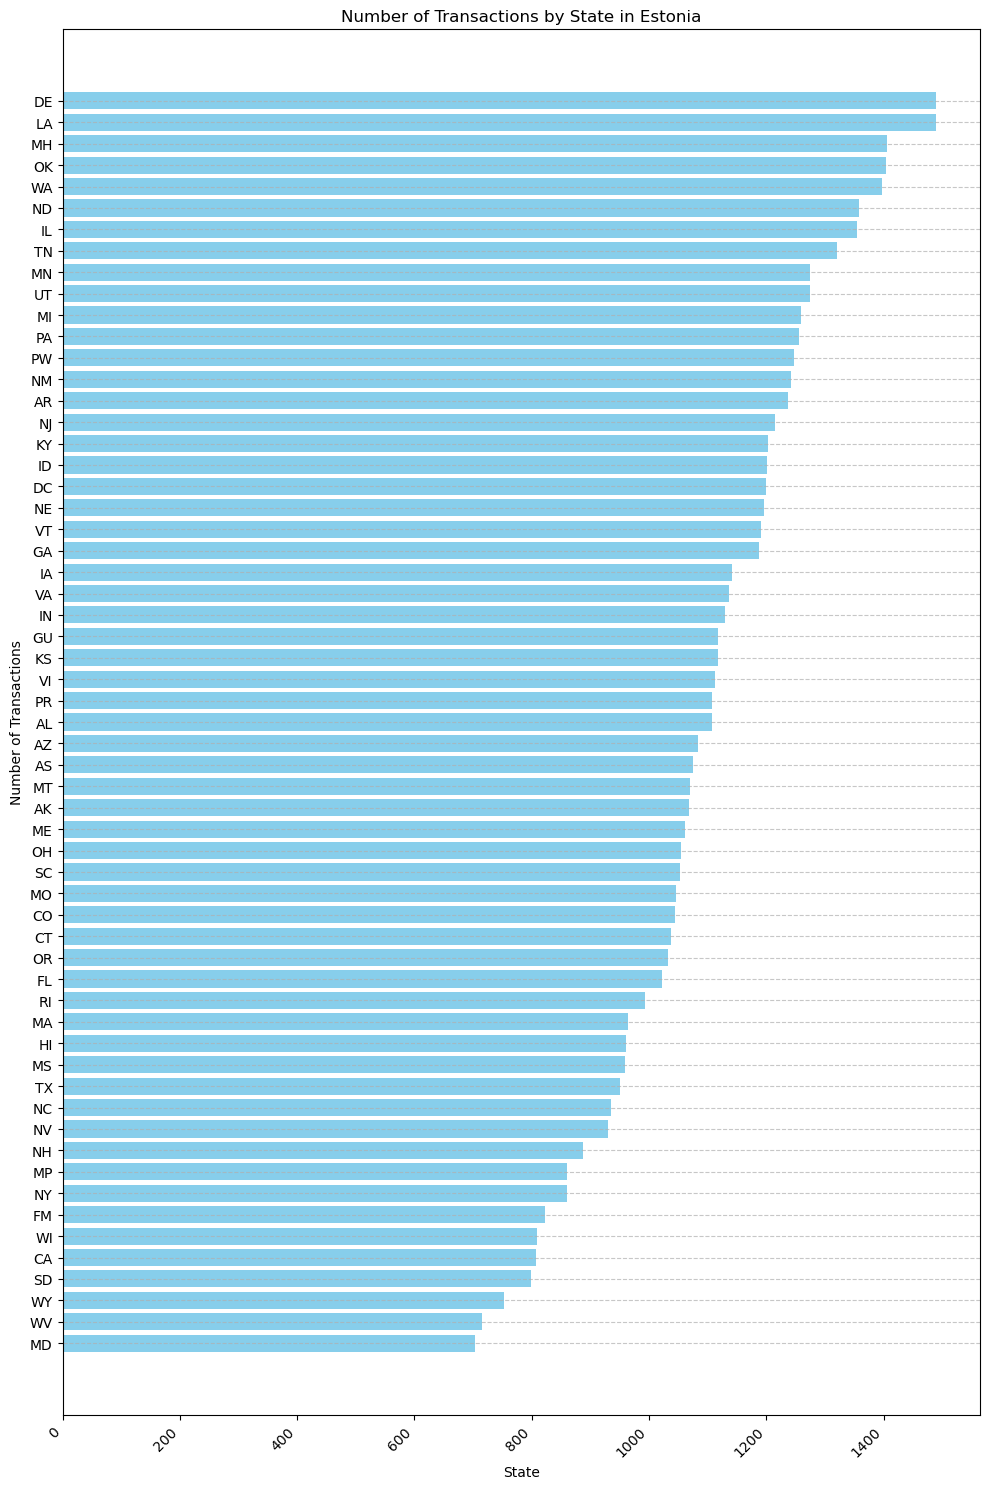

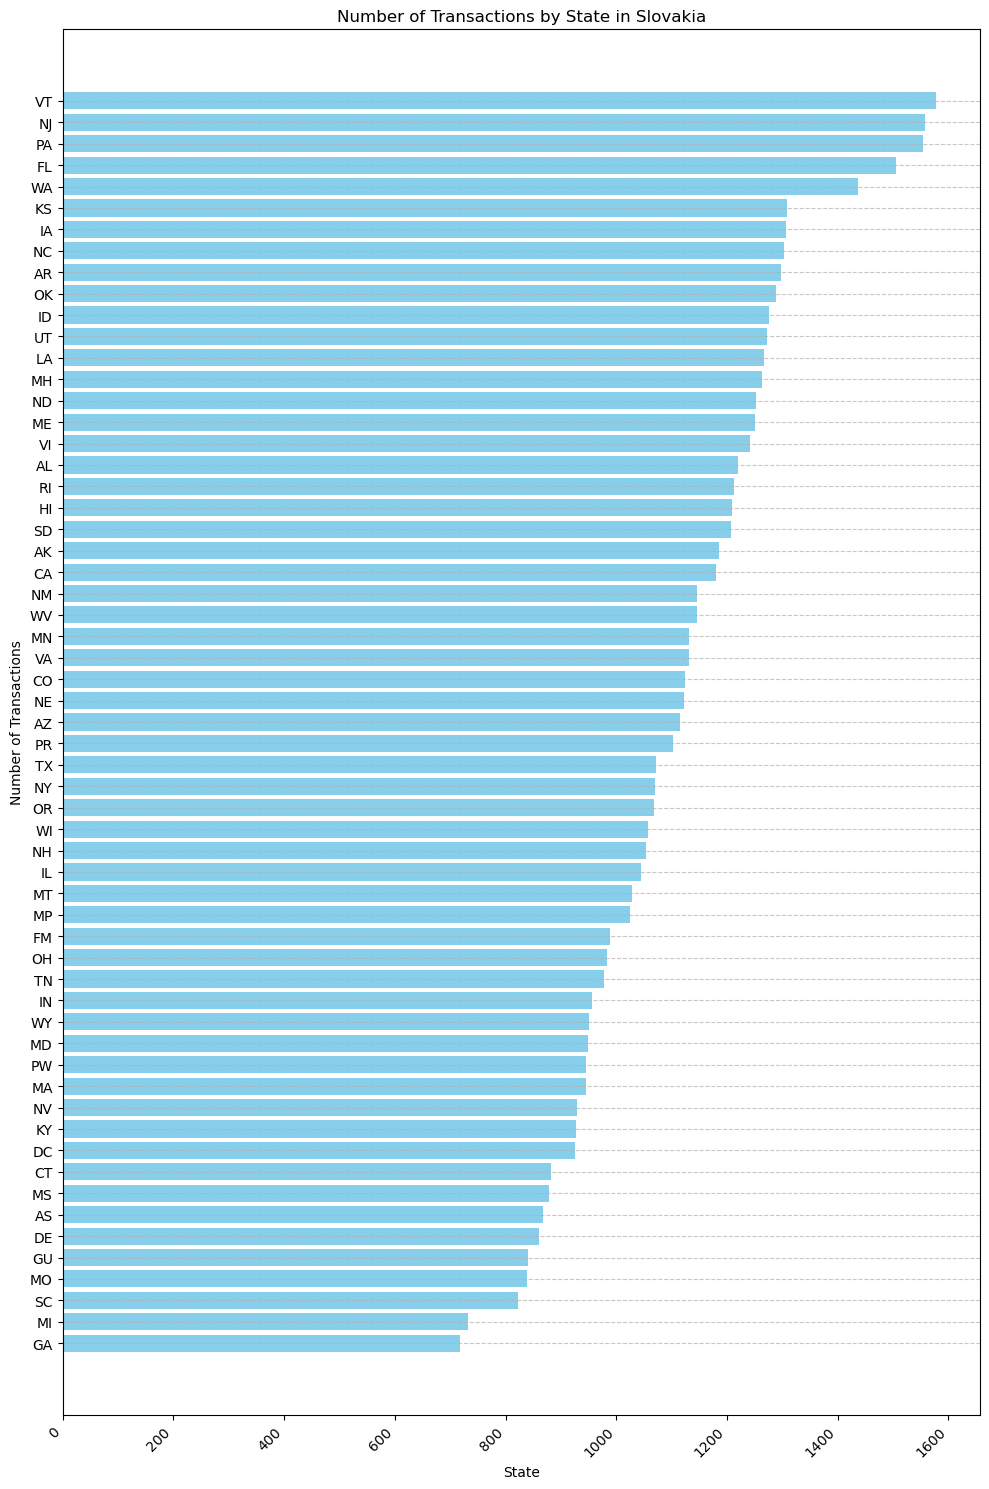

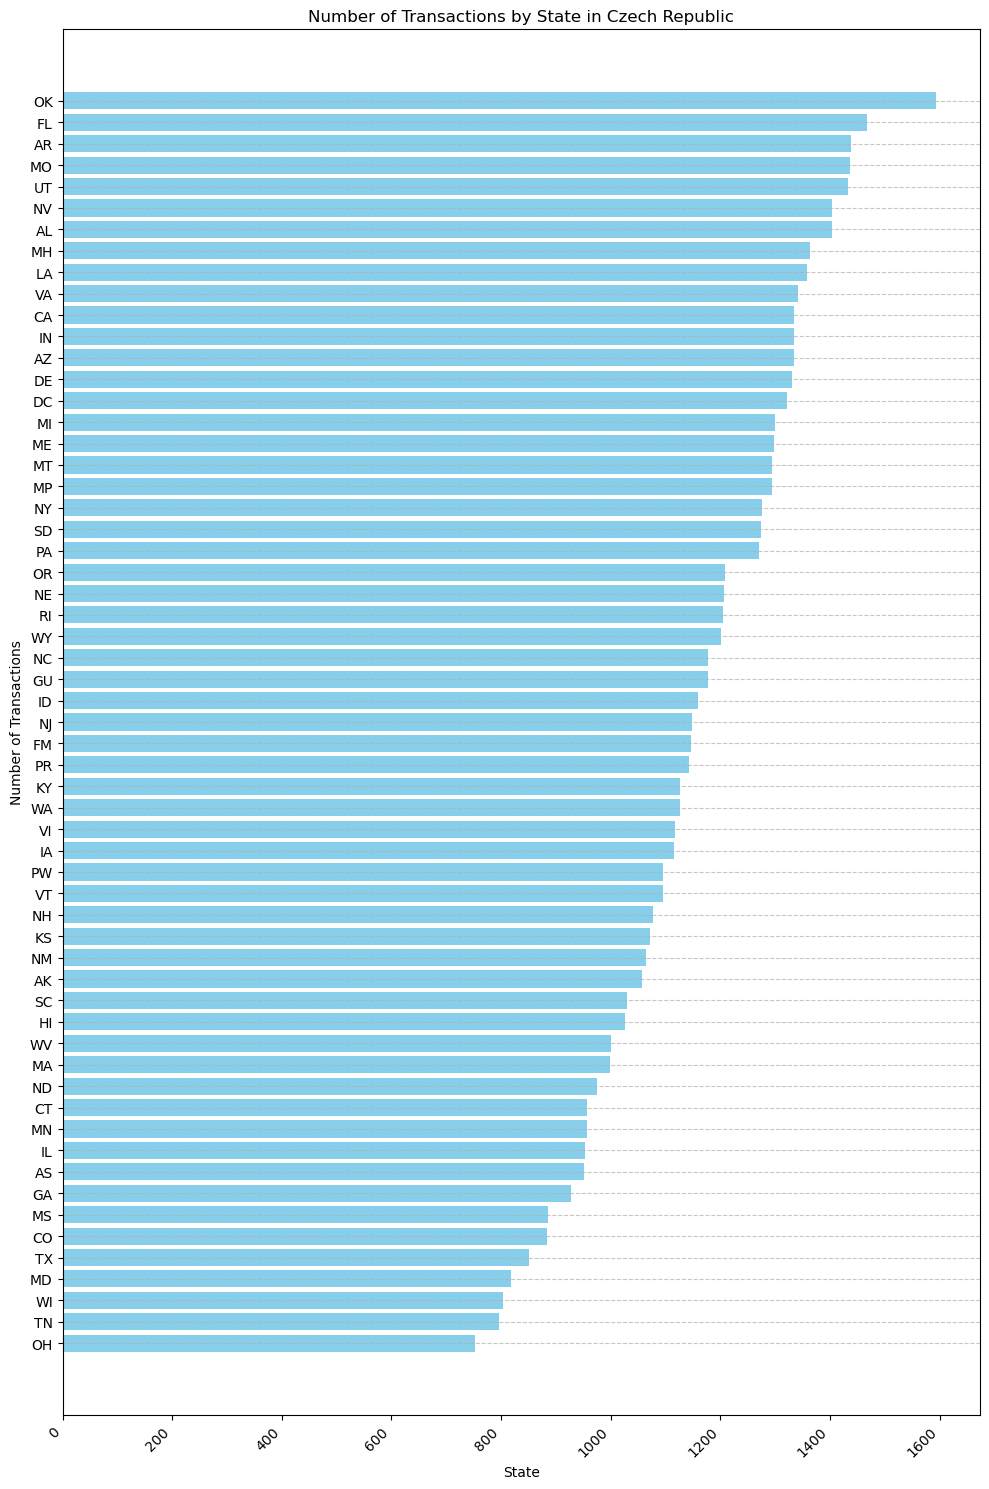

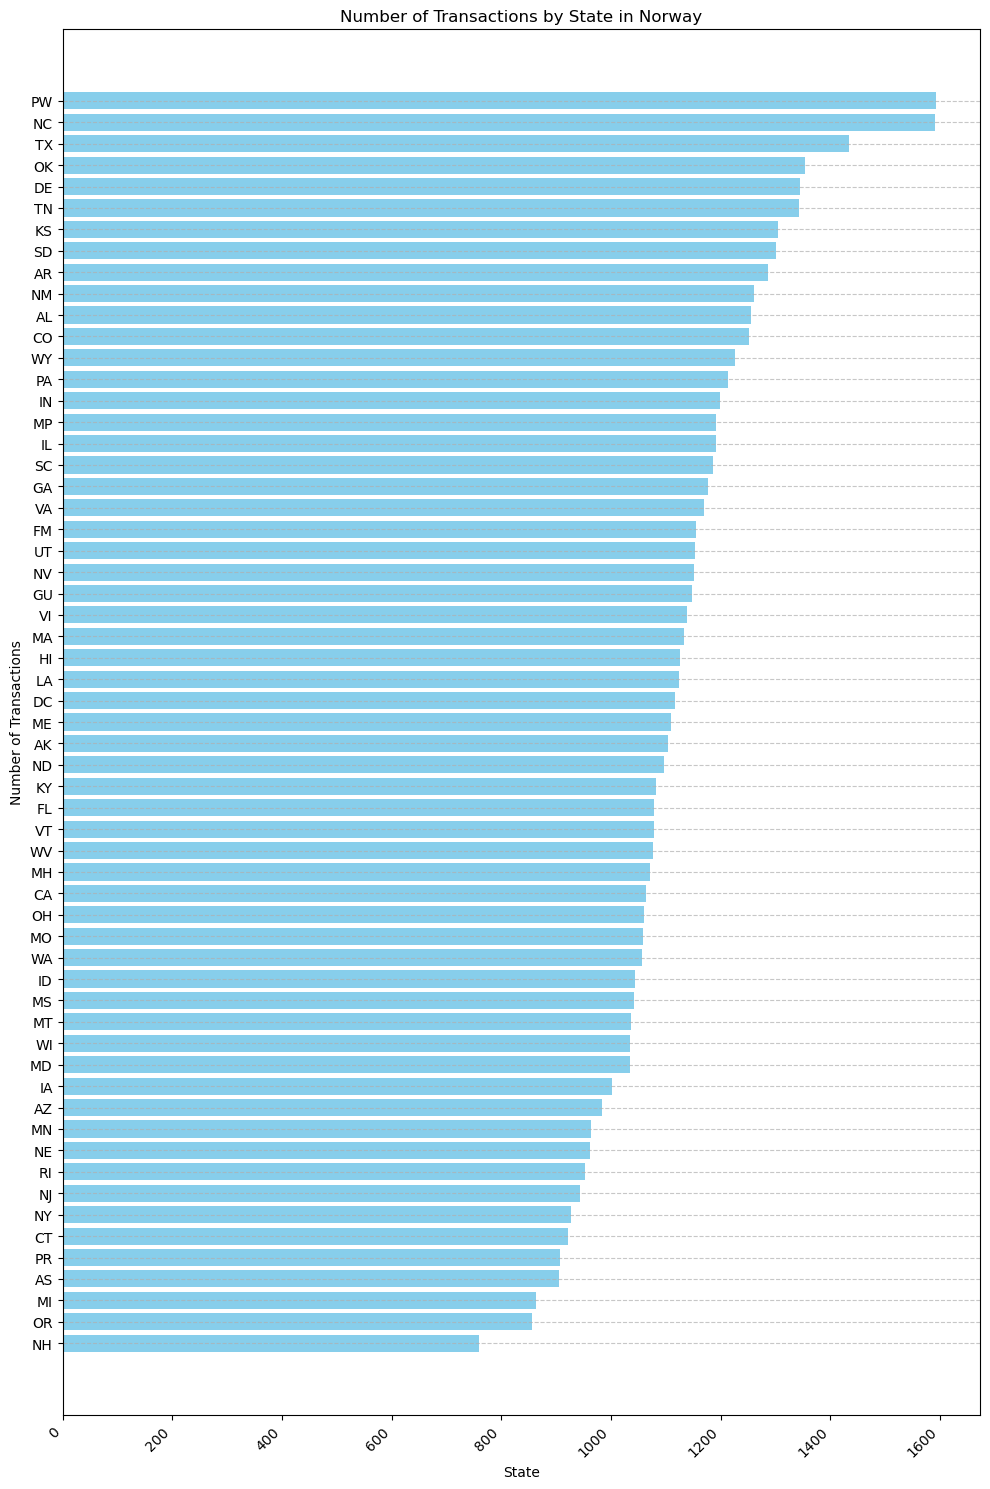

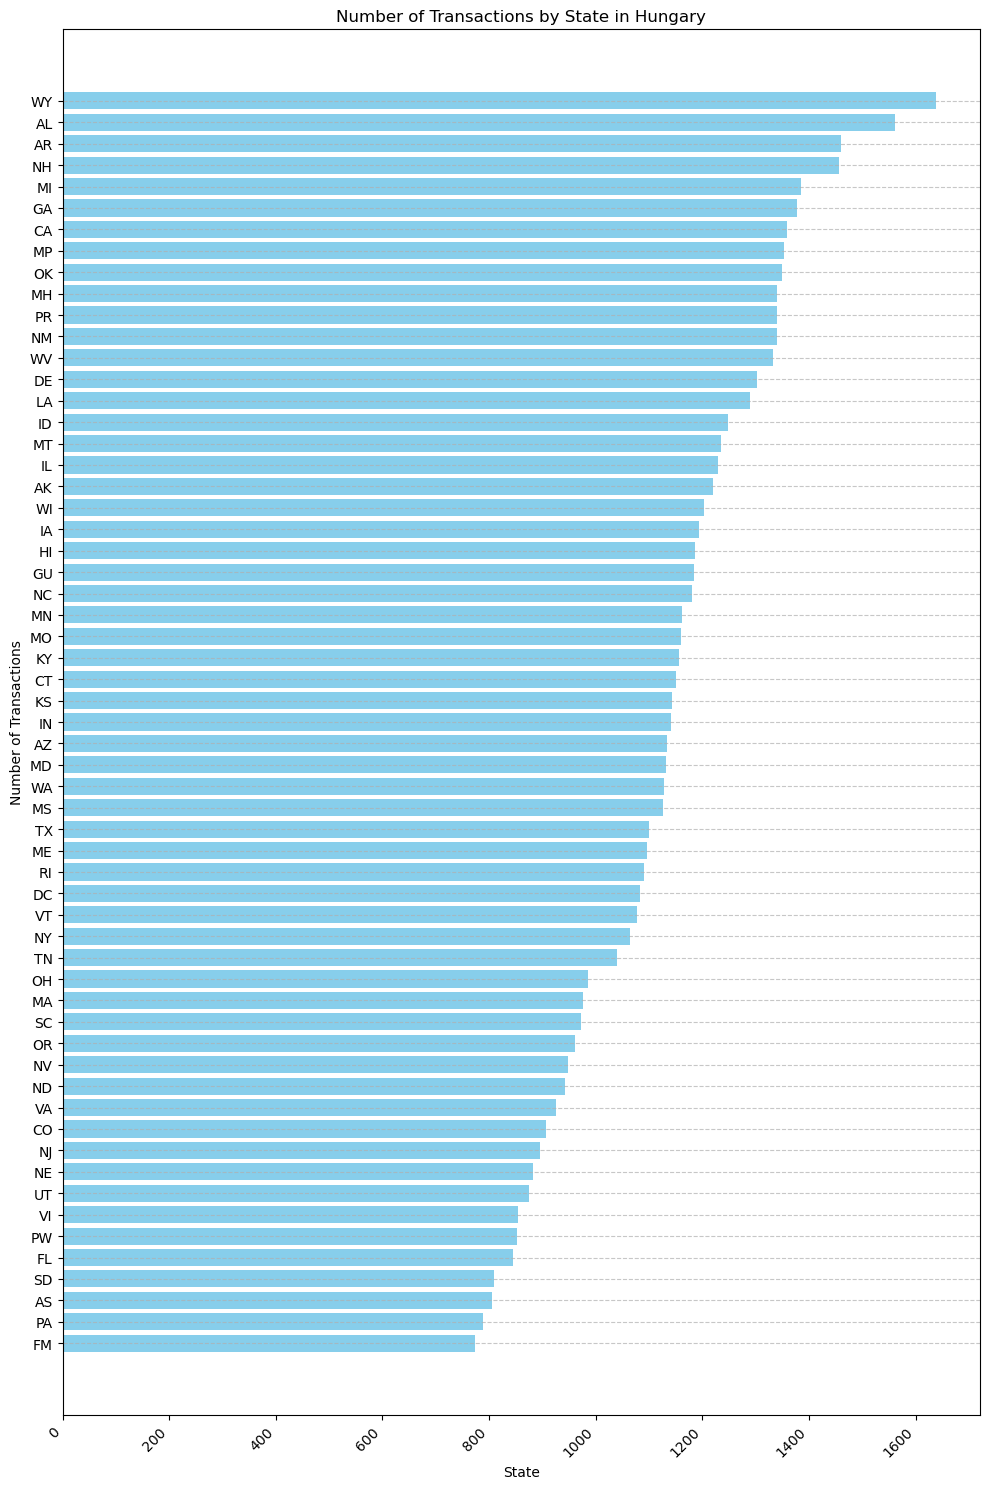

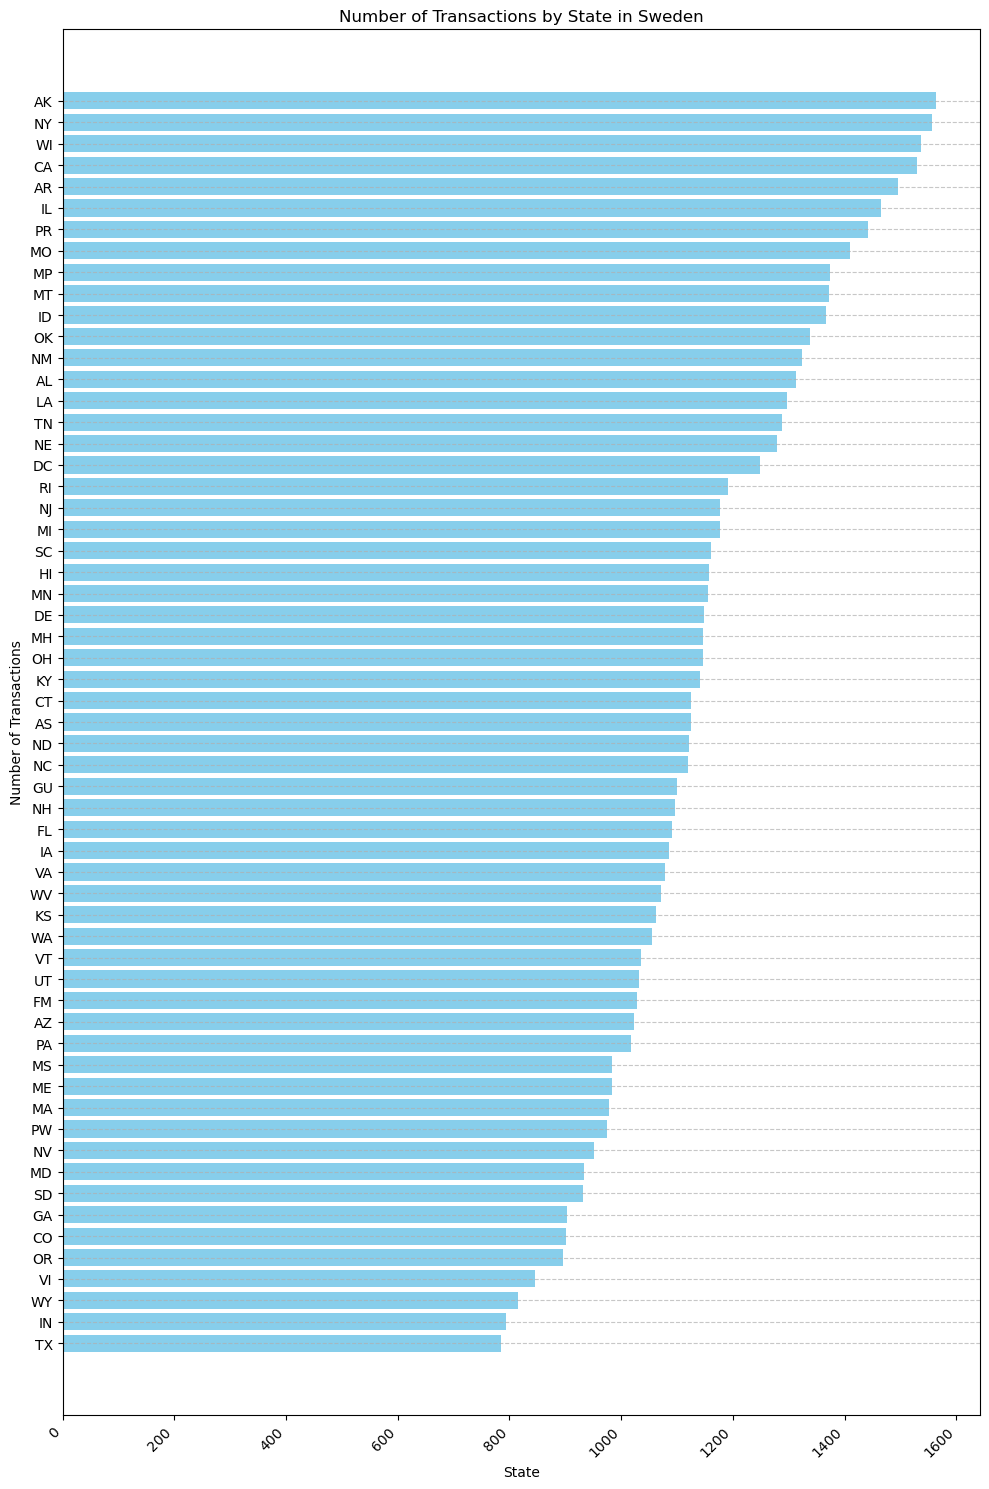

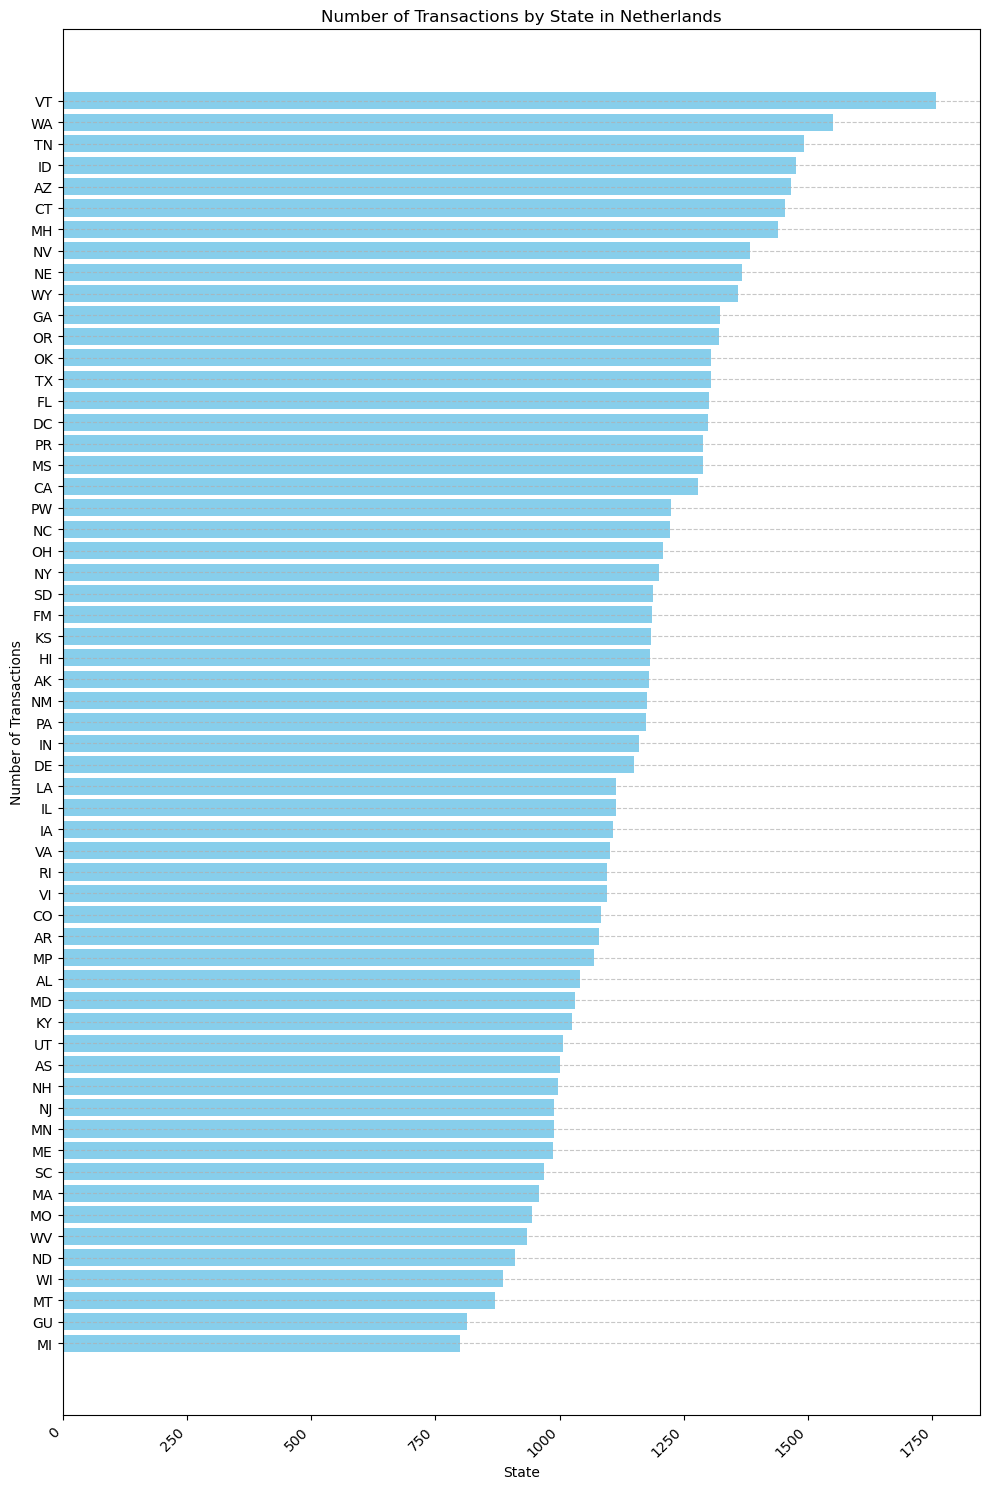

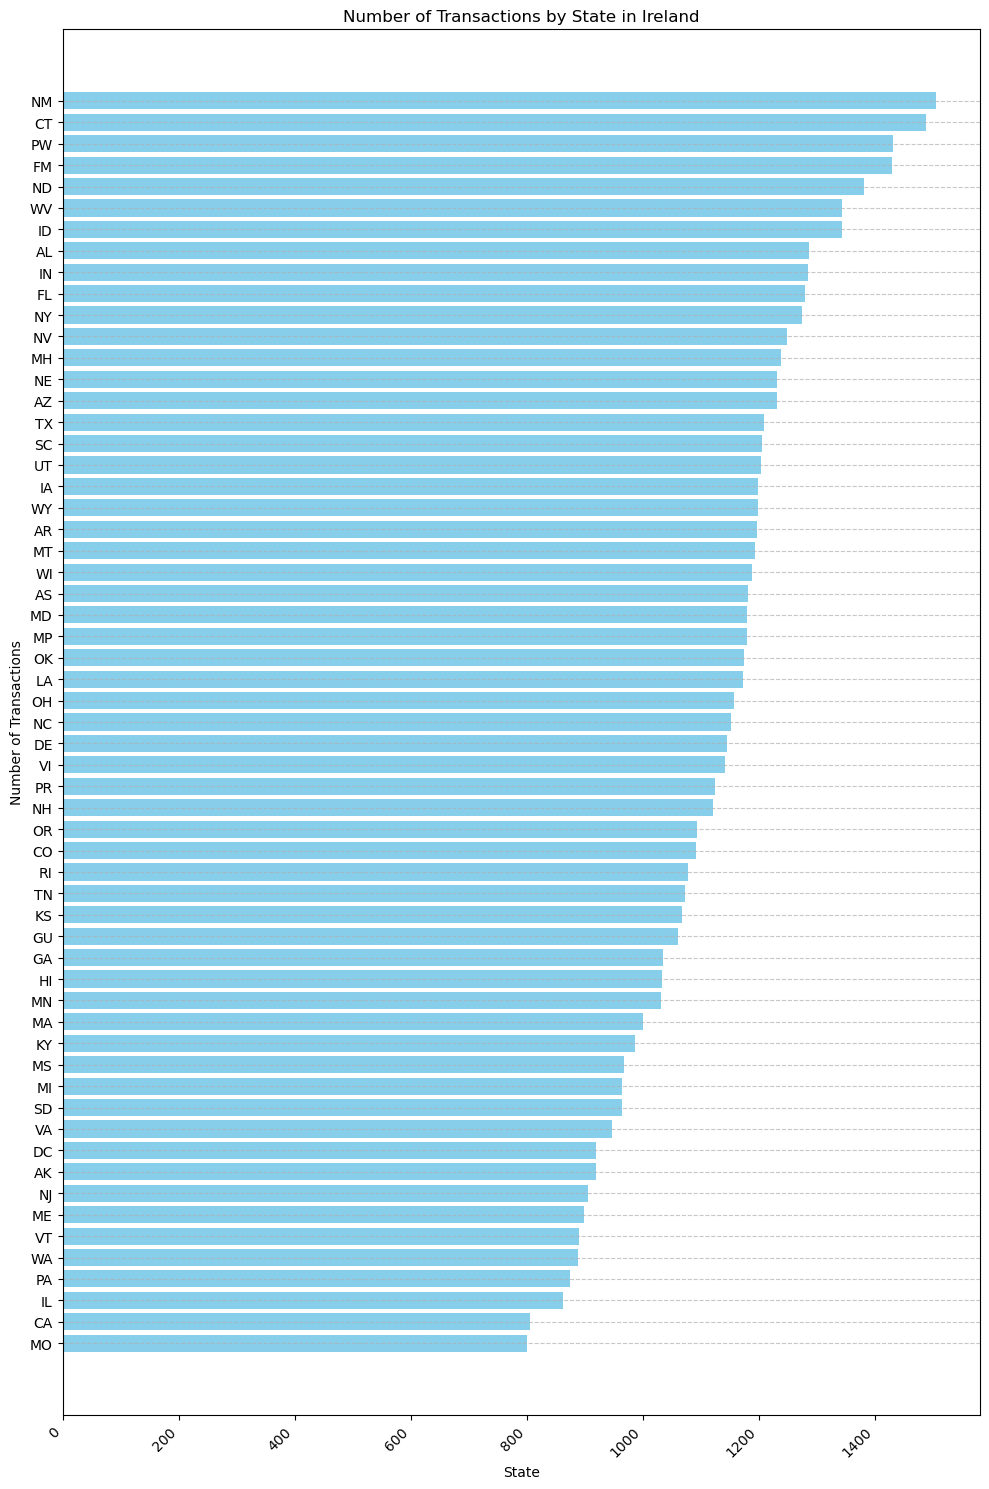

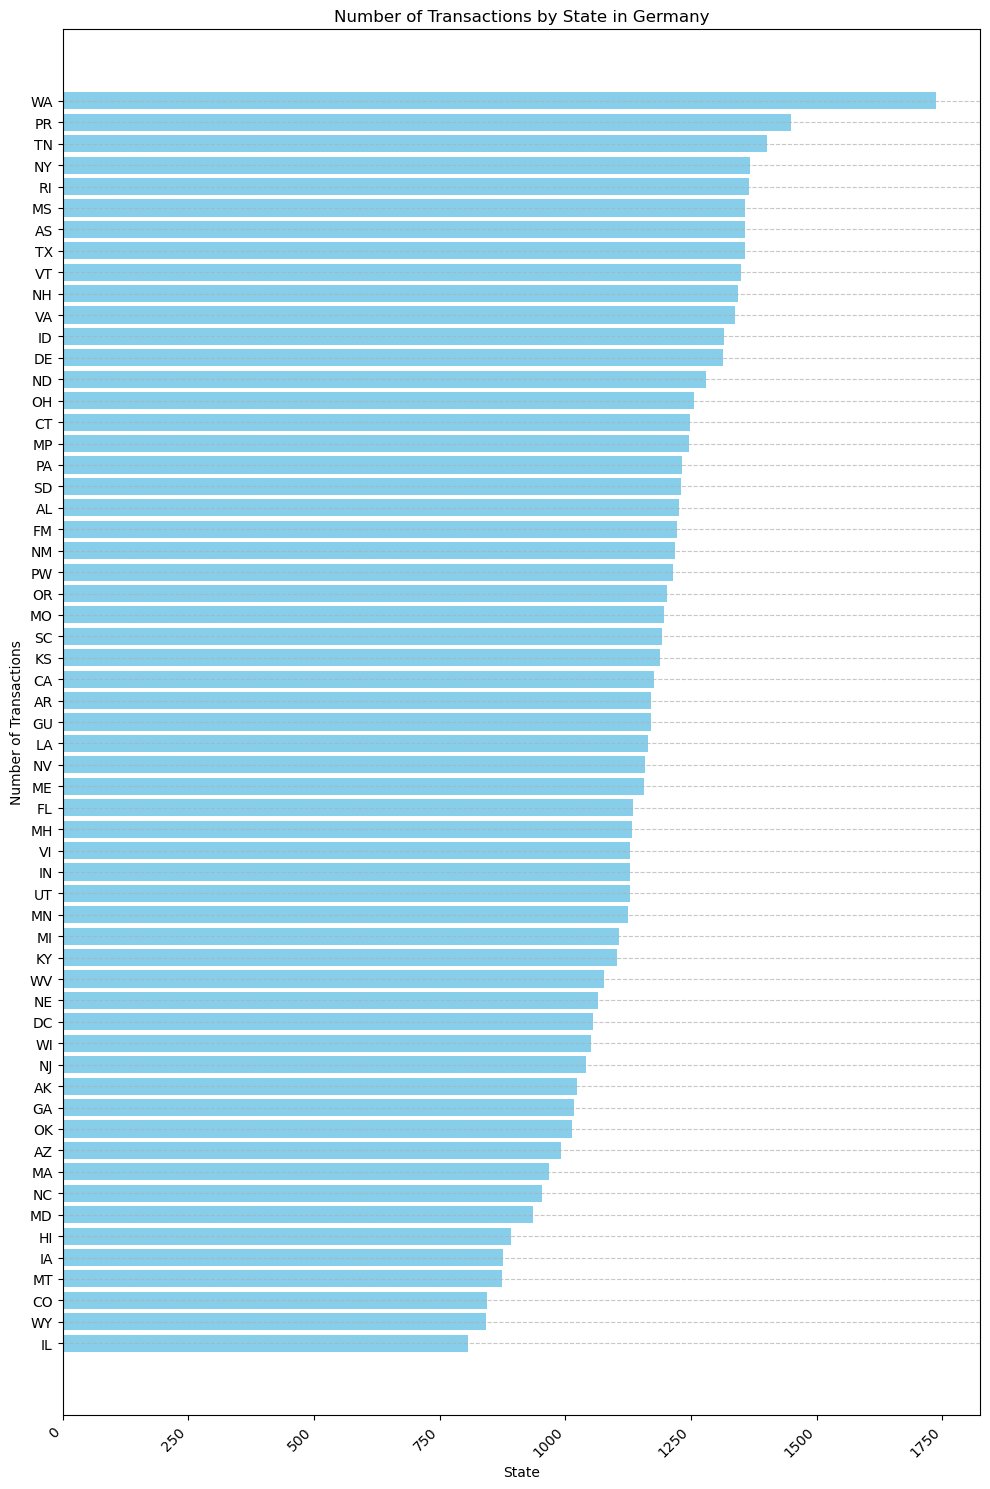

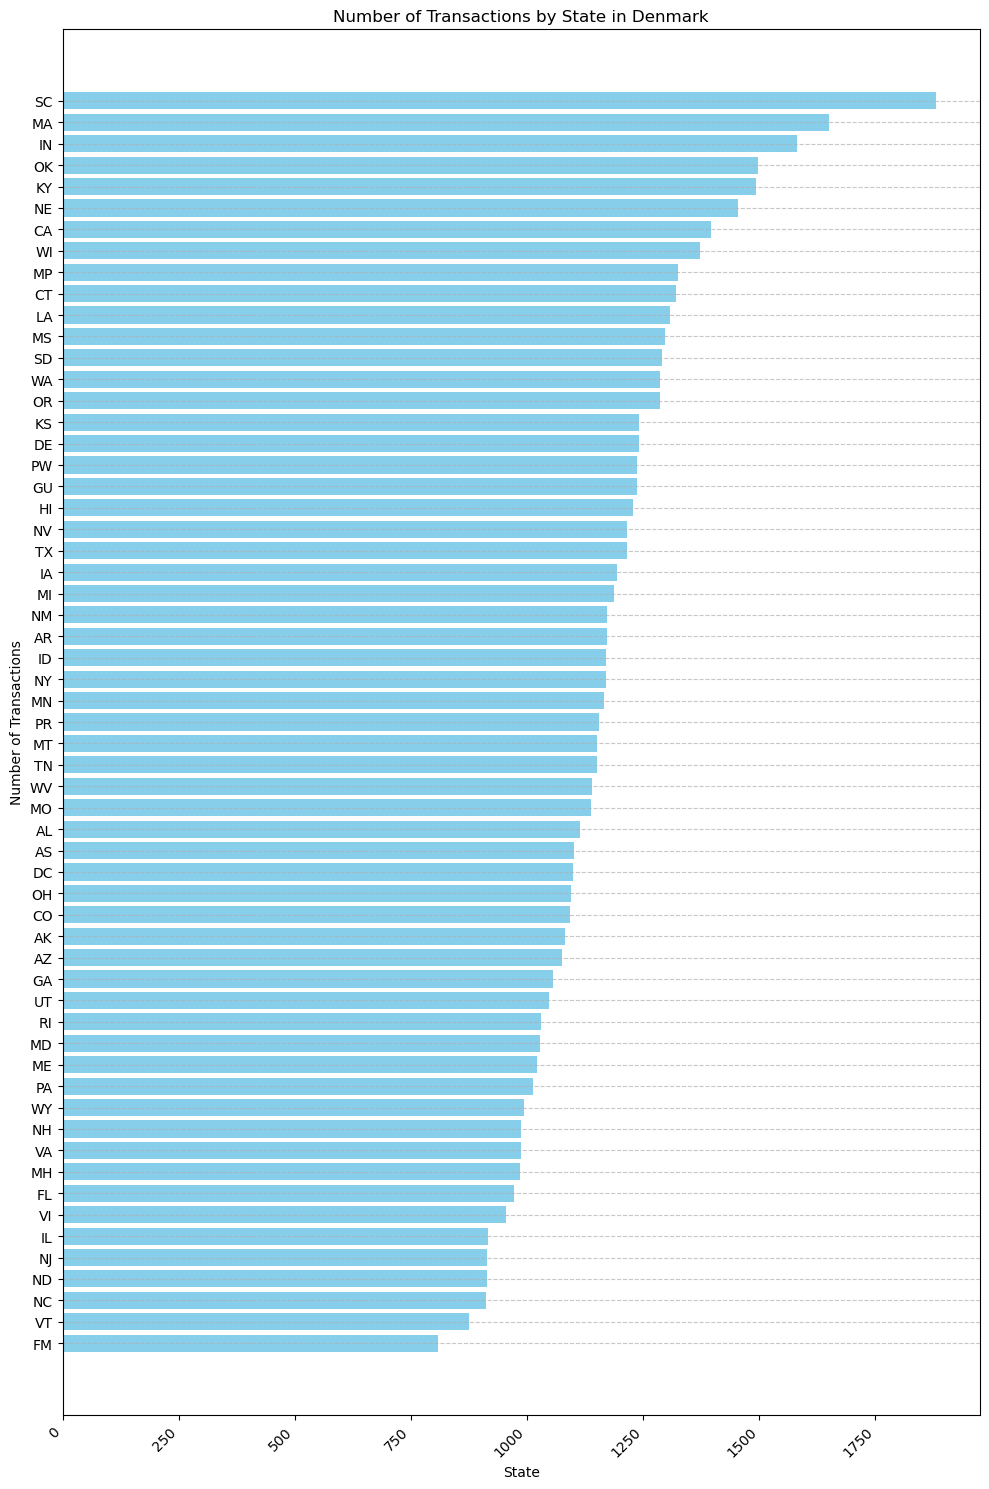

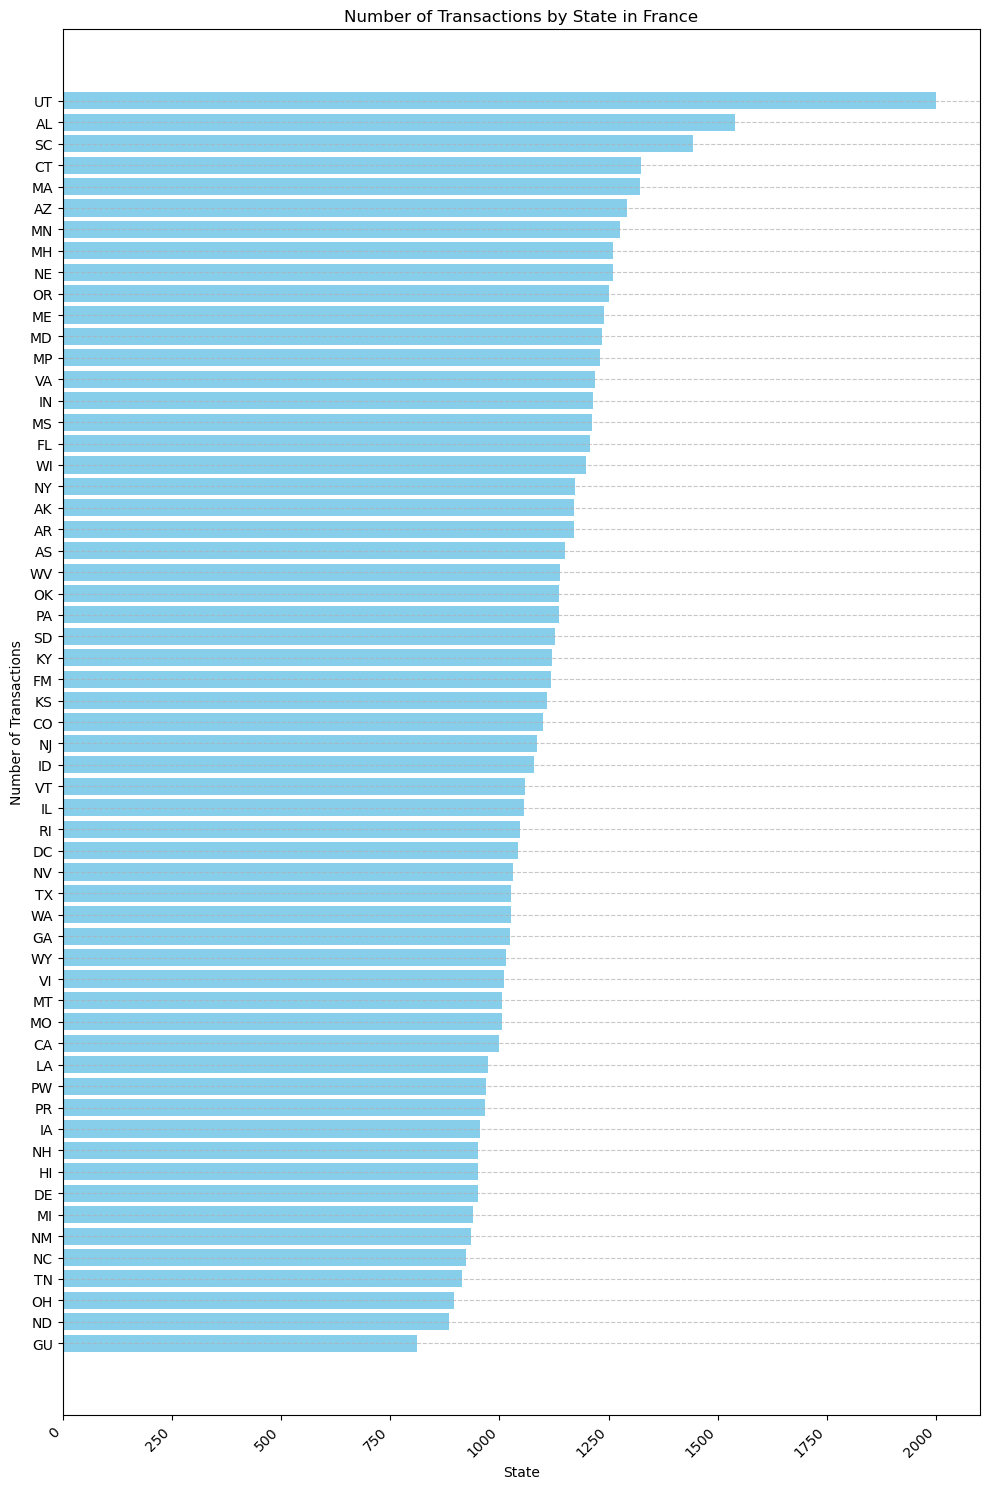

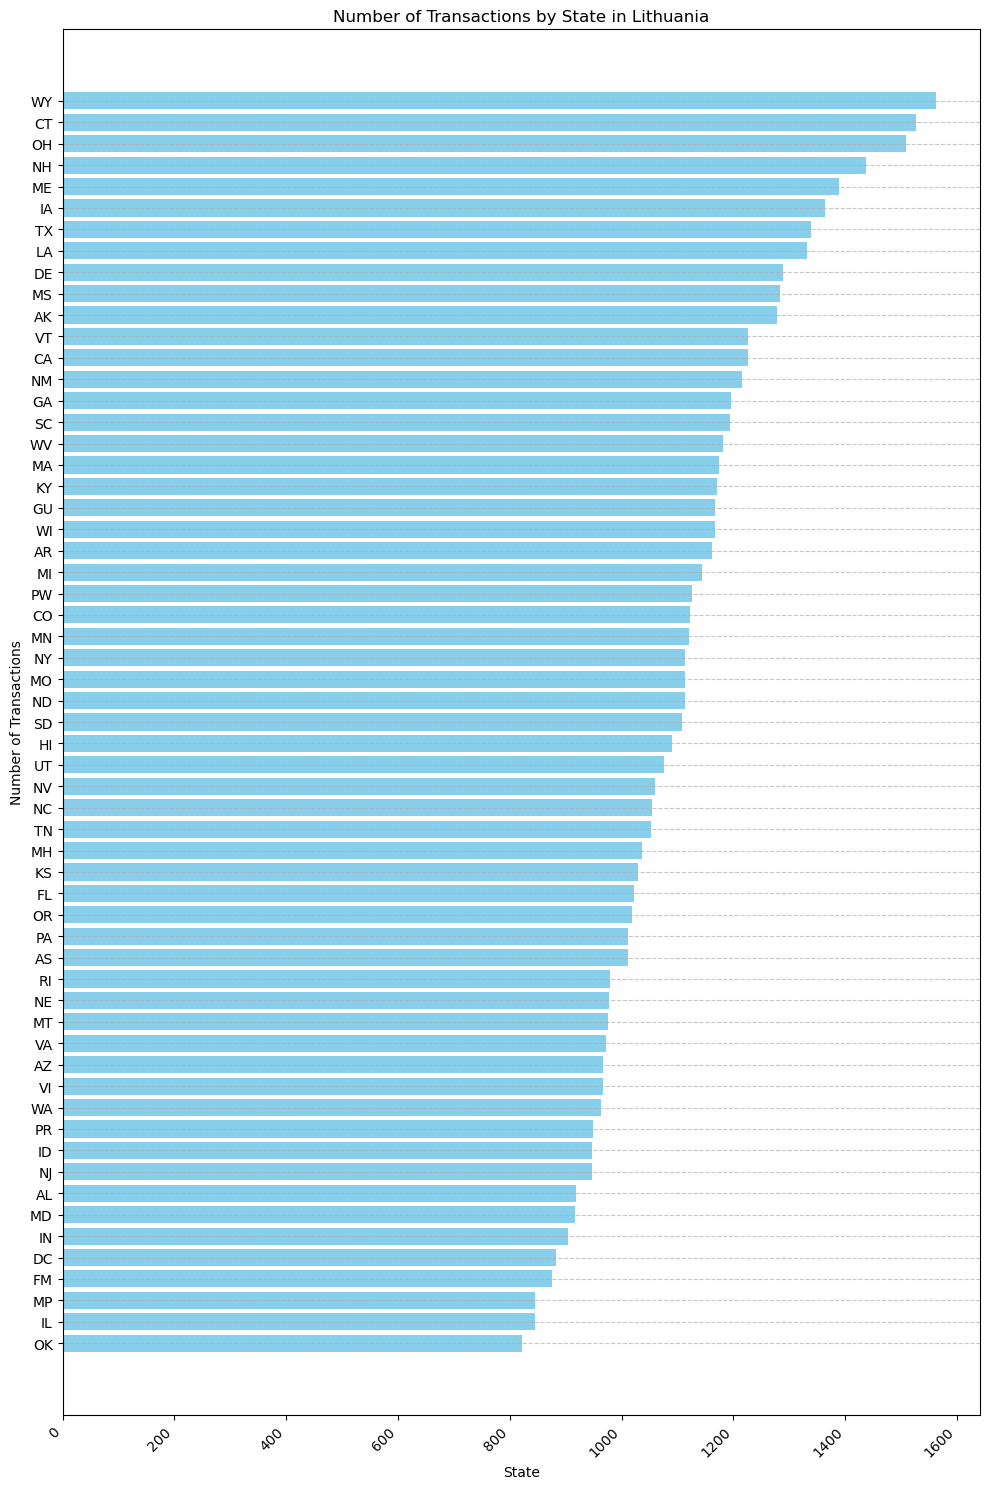

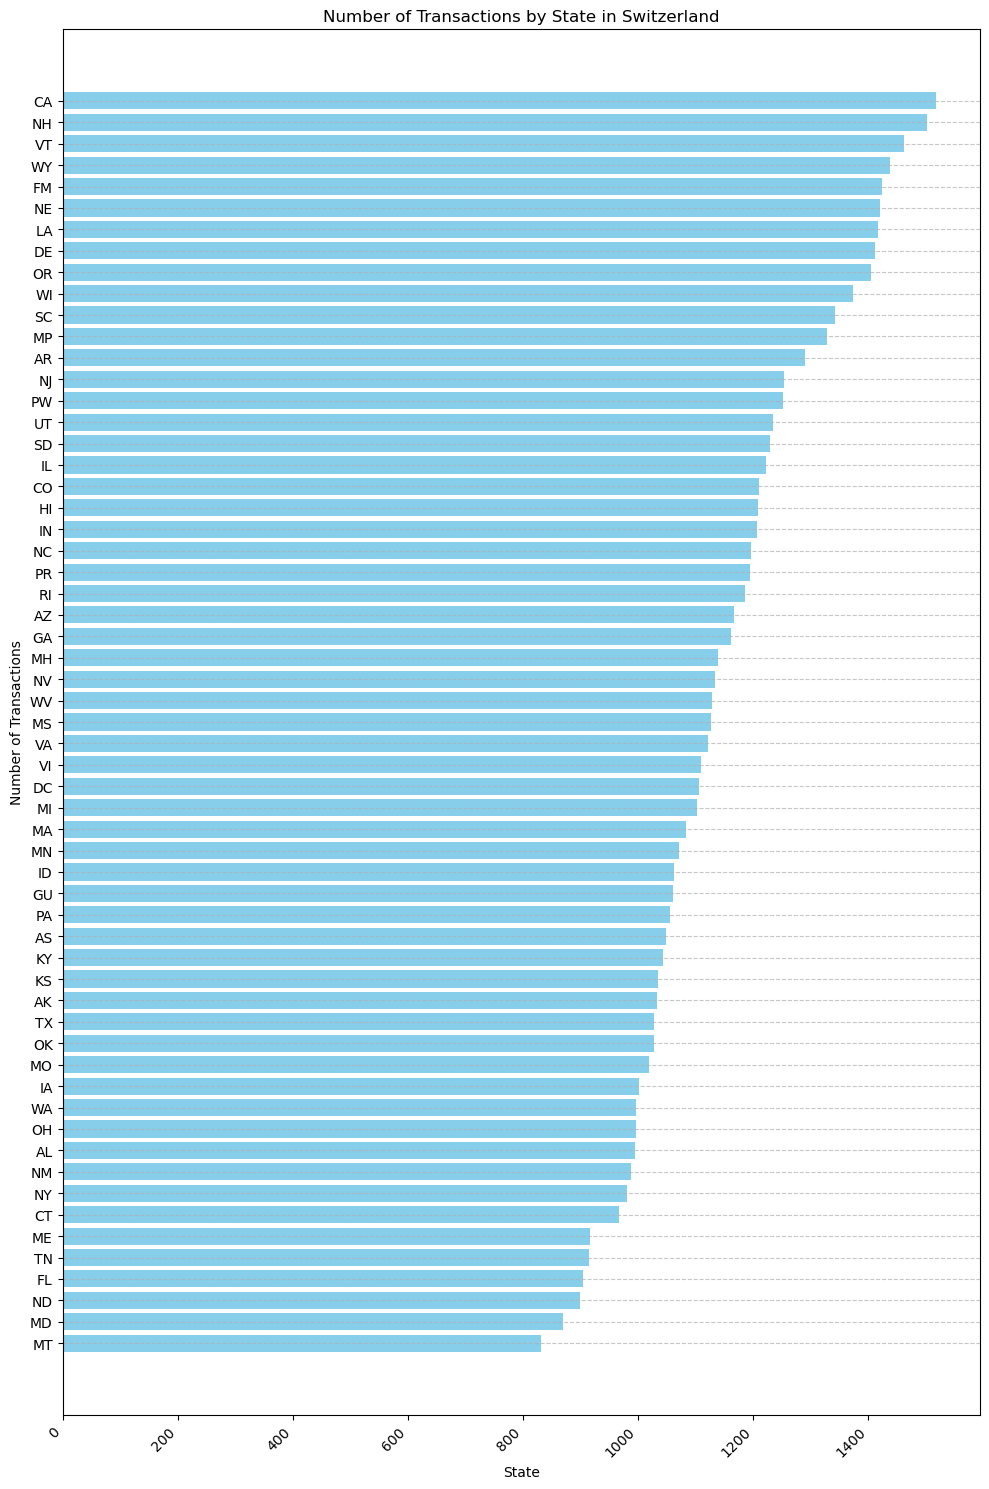

In [30]:
# Group by country and state, then count transactions
state_counts = df.groupby(['country', 'state']).size().reset_index(name='count')
state_counts = state_counts.sort_values(by='count', ascending=True)
# Get the list of unique countries
countries = state_counts['country'].unique()

# Create a bar chart for each country
for country in countries:
    country_data = state_counts[state_counts['country'] == country]

    plt.figure(figsize=(10, 15))
    plt.barh(country_data['state'], country_data['count'], color='skyblue')
    plt.xlabel("State")
    plt.ylabel("Number of Transactions")
    plt.title(f"Number of Transactions by State in {country}")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show the chart
    plt.tight_layout()
    plt.show()

In [31]:
# Initialize LabelEncoders
country_encoder = LabelEncoder()
state_encoder = LabelEncoder()
# Apply encoding
df['country_encoded'] = country_encoder.fit_transform(df['country'])
df['state_encoded'] = state_encoder.fit_transform(df['state'])
# Display the first few rows
df.head()

Id  customer_id  interest_rate              name    country  \
0  2706300            1            0.0    Yolanda Parker  Lithuania   
1  2707917            1            0.0    Yolanda Parker  Lithuania   
2  2362232            3            0.0  Michael Mcknight    Romania   
3  2363817            3            0.0  Michael Mcknight    Romania   
4  2365410            3            0.0  Michael Mcknight    Romania   

  date_of_birth       date  atm_transfer_in  atm_transfer_out  \
0    1954-07-10 2019-09-29                0                 0   
1    1954-07-10 2019-09-30                0                 0   
2    2002-11-09 2019-03-05                0                 0   
3    2002-11-09 2019-03-06                0                 0   
4    2002-11-09 2019-03-07                0                 0   

   bank_transfer_in  ...  touch_point_email  touch_point_appointment  \
0                 3  ...                  0                        0   
1                 3  ...                  0                        0   
2               526  ...                  0                        0   
3               485  ...                  0                        0   
4               439  ...                  0                        0   

   csat_score_phone  csat_score_whatsapp  csat_score_email  \
0               0.0                  0.0               0.0   
1               0.0                  0.0               0.0   
2               0.0                  0.0               0.0   
3               0.0                  0.0               0.0   
4               0.0                  0.0               0.0   

   csat_score_appointment               city  state  country_encoded  \
0                     0.0  Lake Michaelburgh     GU               14   
1                     0.0  Lake Michaelburgh     GU               14   
2                     0.0        Justinmouth     CO               19   
3                     0.0        Justinmouth     CO               19   
4                     0.0        Justinmouth     CO               19   

   state_encoded  
0             13  
1             13  
2              6  
3              6  
4              6  

[5 rows x 35 columns]

In [32]:
countries = list(df['country'].unique())
states = list(df['state'].unique())
df = df.drop(columns = ['country','state'])
df.head()

Id  customer_id  interest_rate              name date_of_birth  \
0  2706300            1            0.0    Yolanda Parker    1954-07-10   
1  2707917            1            0.0    Yolanda Parker    1954-07-10   
2  2362232            3            0.0  Michael Mcknight    2002-11-09   
3  2363817            3            0.0  Michael Mcknight    2002-11-09   
4  2365410            3            0.0  Michael Mcknight    2002-11-09   

        date  atm_transfer_in  atm_transfer_out  bank_transfer_in  \
0 2019-09-29                0                 0                 3   
1 2019-09-30                0                 0                 3   
2 2019-03-05                0                 0               526   
3 2019-03-06                0                 0               485   
4 2019-03-07                0                 0               439   

   bank_transfer_out  ...  touch_point_whatsapp  touch_point_email  \
0                  2  ...                     1                  0   
1                  2  ...                     0                  0   
2                  2  ...                     0                  0   
3                  2  ...                     0                  0   
4                  2  ...                     0                  0   

   touch_point_appointment  csat_score_phone  csat_score_whatsapp  \
0                        0               0.0                  0.0   
1                        0               0.0                  0.0   
2                        0               0.0                  0.0   
3                        0               0.0                  0.0   
4                        0               0.0                  0.0   

   csat_score_email  csat_score_appointment               city  \
0               0.0                     0.0  Lake Michaelburgh   
1               0.0                     0.0  Lake Michaelburgh   
2               0.0                     0.0        Justinmouth   
3               0.0                     0.0        Justinmouth   
4               0.0                     0.0        Justinmouth   

   country_encoded state_encoded  
0               14            13  
1               14            13  
2               19             6  
3               19             6  
4               19             6  

[5 rows x 33 columns]

`city` and `name` may not be necessary so they can be excluded

In [34]:
df = df.drop(columns = ['name','city'])
df.head()

Id  customer_id  interest_rate date_of_birth       date  \
0  2706300            1            0.0    1954-07-10 2019-09-29   
1  2707917            1            0.0    1954-07-10 2019-09-30   
2  2362232            3            0.0    2002-11-09 2019-03-05   
3  2363817            3            0.0    2002-11-09 2019-03-06   
4  2365410            3            0.0    2002-11-09 2019-03-07   

   atm_transfer_in  atm_transfer_out  bank_transfer_in  bank_transfer_out  \
0                0                 0                 3                  2   
1                0                 0                 3                  2   
2                0                 0               526                  2   
3                0                 0               485                  2   
4                0                 0               439                  2   

   crypto_in  ...  touch_point_phone  touch_point_whatsapp  touch_point_email  \
0          8  ...                  2                     1                  0   
1          7  ...                  0                     0                  0   
2          1  ...                  0                     0                  0   
3          1  ...                  0                     0                  0   
4          1  ...                  0                     0                  0   

   touch_point_appointment  csat_score_phone  csat_score_whatsapp  \
0                        0               0.0                  0.0   
1                        0               0.0                  0.0   
2                        0               0.0                  0.0   
3                        0               0.0                  0.0   
4                        0               0.0                  0.0   

   csat_score_email  csat_score_appointment country_encoded  state_encoded  
0               0.0                     0.0              14             13  
1               0.0                     0.0              14             13  
2               0.0                     0.0              19              6  
3               0.0                     0.0              19              6  
4               0.0                     0.0              19              6  

[5 rows x 31 columns]

In [35]:
# Extract year of birth of customer
df['year_of_birth'] = df['date_of_birth'].dt.year
df = df.drop(columns = 'date_of_birth')
# Set `date` as index
df = df.set_index('date')
df.head()

Id  customer_id  interest_rate  atm_transfer_in  \
date                                                               
2019-09-29  2706300            1            0.0                0   
2019-09-30  2707917            1            0.0                0   
2019-03-05  2362232            3            0.0                0   
2019-03-06  2363817            3            0.0                0   
2019-03-07  2365410            3            0.0                0   

            atm_transfer_out  bank_transfer_in  bank_transfer_out  crypto_in  \
date                                                                           
2019-09-29                 0                 3                  2          8   
2019-09-30                 0                 3                  2          7   
2019-03-05                 0               526                  2          1   
2019-03-06                 0               485                  2          1   
2019-03-07                 0               439                  2          1   

            crypto_out  bank_transfer_in_volume  ...  touch_point_whatsapp  \
date                                             ...                         
2019-09-29           7                53.908927  ...                     1   
2019-09-30           7                48.701881  ...                     0   
2019-03-05           1              2118.400033  ...                     0   
2019-03-06           1              2280.130058  ...                     0   
2019-03-07           1              1924.402028  ...                     0   

            touch_point_email  touch_point_appointment  csat_score_phone  \
date                                                                       
2019-09-29                  0                        0               0.0   
2019-09-30                  0                        0               0.0   
2019-03-05                  0                        0               0.0   
2019-03-06                  0                        0               0.0   
2019-03-07                  0                        0               0.0   

            csat_score_whatsapp  csat_score_email csat_score_appointment  \
date                                                                       
2019-09-29                  0.0               0.0                    0.0   
2019-09-30                  0.0               0.0                    0.0   
2019-03-05                  0.0               0.0                    0.0   
2019-03-06                  0.0               0.0                    0.0   
2019-03-07                  0.0               0.0                    0.0   

            country_encoded  state_encoded  year_of_birth  
date                                                       
2019-09-29               14             13           1954  
2019-09-30               14             13           1954  
2019-03-05               19              6           2002  
2019-03-06               19              6           2002  
2019-03-07               19              6           2002  

[5 rows x 30 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1867263 entries, 2019-09-29 to 2023-12-31
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Id                        int64  
 1   customer_id               int64  
 2   interest_rate             float64
 3   atm_transfer_in           int64  
 4   atm_transfer_out          int64  
 5   bank_transfer_in          int64  
 6   bank_transfer_out         int64  
 7   crypto_in                 int64  
 8   crypto_out                int64  
 9   bank_transfer_in_volume   float64
 10  bank_transfer_out_volume  float64
 11  crypto_in_volume          float64
 12  crypto_out_volume         float64
 13  complaints                int64  
 14  tenure                    int64  
 15  from_competitor           int64  
 16  job                       object 
 17  churn_due_to_fraud        int64  
 18  model_predicted_fraud     int64  
 19  touch_point_phone         int64  
 20  touch_poi

In [37]:
df['job'].unique()

array(['Amenity horticulturist', 'Engineer, broadcasting (operations)',
       'Occupational hygienist', 'Engineer, agricultural',
       'Theatre manager', 'Legal executive', 'Ranger/warden',
       'Therapist, nutritional', 'Radio broadcast assistant',
       'Financial controller', 'Editorial assistant',
       'Chartered certified accountant', 'Scientist, water quality',
       'Barrister', 'Audiological scientist', 'Immigration officer',
       'Restaurant manager', 'Haematologist', 'Pharmacist, community',
       'Scientist, product/process development', 'Gaffer',
       'Dramatherapist', 'Information systems manager',
       'Surveyor, rural practice', 'Engineer, biomedical',
       'Investment banker, corporate', 'Newspaper journalist',
       'Records manager', 'Recycling officer', 'Therapist, art',
       'Designer, furniture', 'Biochemist, clinical', 'Quality manager',
       'Sports therapist', 'Media planner', 'Buyer, industrial',
       'Chief Financial Officer', 'Designe

In [38]:
job_categories = {
    'Engineering': ['engineer', 'technician', 'mechanic', 'developer'],
    'Healthcare': ['doctor', 'nurse', 'pharmacist', 'therapist'],
    'Finance': ['accountant', 'banker', 'trader', 'financial'],
    'Education': ['teacher', 'lecturer', 'professor'],
    'IT': ['developer', 'software', 'IT', 'programmer'],
    'Law': ['lawyer', 'solicitor', 'barrister'],
    'Media': ['journalist', 'producer', 'editor', 'broadcaster'],
}

# Function to classify job titles
def classify_job(title):
    title = title.lower()
    for category, keywords in job_categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'

# Apply classification
df['job_category'] = df['job'].apply(classify_job)
job = df['job']
df = df.drop(columns = 'job')
display(df.head())

Id  customer_id  interest_rate  atm_transfer_in  \
date                                                               
2019-09-29  2706300            1            0.0                0   
2019-09-30  2707917            1            0.0                0   
2019-03-05  2362232            3            0.0                0   
2019-03-06  2363817            3            0.0                0   
2019-03-07  2365410            3            0.0                0   

            atm_transfer_out  bank_transfer_in  bank_transfer_out  crypto_in  \
date                                                                           
2019-09-29                 0                 3                  2          8   
2019-09-30                 0                 3                  2          7   
2019-03-05                 0               526                  2          1   
2019-03-06                 0               485                  2          1   
2019-03-07                 0               439                  2          1   

            crypto_out  bank_transfer_in_volume  ...  touch_point_email  \
date                                             ...                      
2019-09-29           7                53.908927  ...                  0   
2019-09-30           7                48.701881  ...                  0   
2019-03-05           1              2118.400033  ...                  0   
2019-03-06           1              2280.130058  ...                  0   
2019-03-07           1              1924.402028  ...                  0   

            touch_point_appointment  csat_score_phone  csat_score_whatsapp  \
date                                                                         
2019-09-29                        0               0.0                  0.0   
2019-09-30                        0               0.0                  0.0   
2019-03-05                        0               0.0                  0.0   
2019-03-06                        0               0.0                  0.0   
2019-03-07                        0               0.0                  0.0   

            csat_score_email  csat_score_appointment  country_encoded  \
date                                                                    
2019-09-29               0.0                     0.0               14   
2019-09-30               0.0                     0.0               14   
2019-03-05               0.0                     0.0               19   
2019-03-06               0.0                     0.0               19   
2019-03-07               0.0                     0.0               19   

            state_encoded  year_of_birth  job_category  
date                                                    
2019-09-29             13           1954         Other  
2019-09-30             13           1954         Other  
2019-03-05              6           2002   Engineering  
2019-03-06              6           2002   Engineering  
2019-03-07              6           2002   Engineering  

[5 rows x 30 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1867263 entries, 2019-09-29 to 2023-12-31
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Id                        int64  
 1   customer_id               int64  
 2   interest_rate             float64
 3   atm_transfer_in           int64  
 4   atm_transfer_out          int64  
 5   bank_transfer_in          int64  
 6   bank_transfer_out         int64  
 7   crypto_in                 int64  
 8   crypto_out                int64  
 9   bank_transfer_in_volume   float64
 10  bank_transfer_out_volume  float64
 11  crypto_in_volume          float64
 12  crypto_out_volume         float64
 13  complaints                int64  
 14  tenure                    int64  
 15  from_competitor           int64  
 16  churn_due_to_fraud        int64  
 17  model_predicted_fraud     int64  
 18  touch_point_phone         int64  
 19  touch_point_whatsapp      int64  
 20  touch_poi

In [40]:
job_encoded = LabelEncoder()
df['job_encoded'] = job_encoded.fit_transform(df['job_category'])
job_category = df['job_category']
df = df.drop(columns = 'job_category')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1867263 entries, 2019-09-29 to 2023-12-31
Data columns (total 30 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Id                        int64  
 1   customer_id               int64  
 2   interest_rate             float64
 3   atm_transfer_in           int64  
 4   atm_transfer_out          int64  
 5   bank_transfer_in          int64  
 6   bank_transfer_out         int64  
 7   crypto_in                 int64  
 8   crypto_out                int64  
 9   bank_transfer_in_volume   float64
 10  bank_transfer_out_volume  float64
 11  crypto_in_volume          float64
 12  crypto_out_volume         float64
 13  complaints                int64  
 14  tenure                    int64  
 15  from_competitor           int64  
 16  churn_due_to_fraud        int64  
 17  model_predicted_fraud     int64  
 18  touch_point_phone         int64  
 19  touch_point_whatsapp      int64  
 20  touch_poi

In [41]:
df.head()

Id  customer_id  interest_rate  atm_transfer_in  \
date                                                               
2019-09-29  2706300            1            0.0                0   
2019-09-30  2707917            1            0.0                0   
2019-03-05  2362232            3            0.0                0   
2019-03-06  2363817            3            0.0                0   
2019-03-07  2365410            3            0.0                0   

            atm_transfer_out  bank_transfer_in  bank_transfer_out  crypto_in  \
date                                                                           
2019-09-29                 0                 3                  2          8   
2019-09-30                 0                 3                  2          7   
2019-03-05                 0               526                  2          1   
2019-03-06                 0               485                  2          1   
2019-03-07                 0               439                  2          1   

            crypto_out  bank_transfer_in_volume  ...  touch_point_email  \
date                                             ...                      
2019-09-29           7                53.908927  ...                  0   
2019-09-30           7                48.701881  ...                  0   
2019-03-05           1              2118.400033  ...                  0   
2019-03-06           1              2280.130058  ...                  0   
2019-03-07           1              1924.402028  ...                  0   

            touch_point_appointment  csat_score_phone  csat_score_whatsapp  \
date                                                                         
2019-09-29                        0               0.0                  0.0   
2019-09-30                        0               0.0                  0.0   
2019-03-05                        0               0.0                  0.0   
2019-03-06                        0               0.0                  0.0   
2019-03-07                        0               0.0                  0.0   

            csat_score_email  csat_score_appointment  country_encoded  \
date                                                                    
2019-09-29               0.0                     0.0               14   
2019-09-30               0.0                     0.0               14   
2019-03-05               0.0                     0.0               19   
2019-03-06               0.0                     0.0               19   
2019-03-07               0.0                     0.0               19   

            state_encoded  year_of_birth  job_encoded  
date                                                   
2019-09-29             13           1954            7  
2019-09-30             13           1954            7  
2019-03-05              6           2002            1  
2019-03-06              6           2002            1  
2019-03-07              6           2002            1  

[5 rows x 30 columns]

In [42]:
df = df.drop(columns = 'Id')
df.head()

customer_id  interest_rate  atm_transfer_in  atm_transfer_out  \
date                                                                        
2019-09-29            1            0.0                0                 0   
2019-09-30            1            0.0                0                 0   
2019-03-05            3            0.0                0                 0   
2019-03-06            3            0.0                0                 0   
2019-03-07            3            0.0                0                 0   

            bank_transfer_in  bank_transfer_out  crypto_in  crypto_out  \
date                                                                     
2019-09-29                 3                  2          8           7   
2019-09-30                 3                  2          7           7   
2019-03-05               526                  2          1           1   
2019-03-06               485                  2          1           1   
2019-03-07               439                  2          1           1   

            bank_transfer_in_volume  bank_transfer_out_volume  ...  \
date                                                           ...   
2019-09-29                53.908927                 22.306016  ...   
2019-09-30                48.701881                 21.434122  ...   
2019-03-05              2118.400033                266.006607  ...   
2019-03-06              2280.130058                320.672874  ...   
2019-03-07              1924.402028                255.356516  ...   

            touch_point_email  touch_point_appointment  csat_score_phone  \
date                                                                       
2019-09-29                  0                        0               0.0   
2019-09-30                  0                        0               0.0   
2019-03-05                  0                        0               0.0   
2019-03-06                  0                        0               0.0   
2019-03-07                  0                        0               0.0   

            csat_score_whatsapp  csat_score_email  csat_score_appointment  \
date                                                                        
2019-09-29                  0.0               0.0                     0.0   
2019-09-30                  0.0               0.0                     0.0   
2019-03-05                  0.0               0.0                     0.0   
2019-03-06                  0.0               0.0                     0.0   
2019-03-07                  0.0               0.0                     0.0   

            country_encoded  state_encoded  year_of_birth  job_encoded  
date                                                                    
2019-09-29               14             13           1954            7  
2019-09-30               14             13           1954            7  
2019-03-05               19              6           2002            1  
2019-03-06               19              6           2002            1  
2019-03-07               19              6           2002            1  

[5 rows x 29 columns]

## Divide the dataset into clusters using Kmeans

In [44]:
X = df.drop(columns = 'customer_id')
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

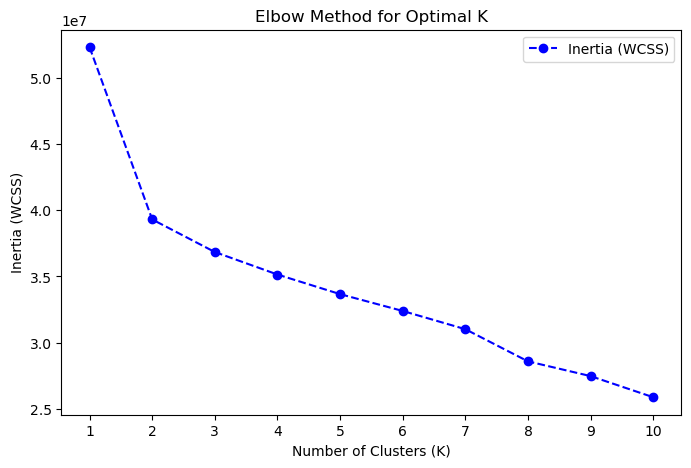

In [45]:
# Try different values of K
wcss = []  # Store inertia values
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b', label='Inertia (WCSS)')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.legend()
plt.show()

From this graph, can see that with cluster number equal to 2 is the optimal K

In [47]:
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Get cluster centers
centroids = kmeans.cluster_centers_

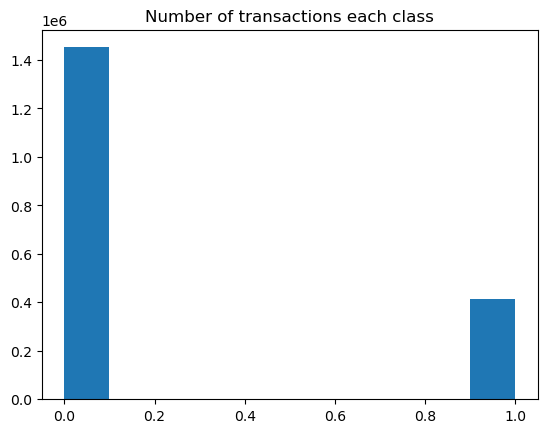

In [48]:
# Visualize 2 classes
plt.hist(df['Cluster'])
plt.title("Number of transactions each class")
plt.show()

Now we examinate each class to see which class is churned customers and which is not

# RFM analysis

In order to know which class is for churned customers and which is not, we can use RFM analysis. RFM stands for:
- **Recency (R)** → How recently a customer made a purchase. Customers who bought recently are more likely to buy again.
- **Frequency (F)** → How often a customer makes purchases. Frequent buyers are more loyal.
- **Monetary (M)** → How much money a customer has spent. High spenders are valuable customers.

In [52]:
cluster_summary = df.drop(columns = ['customer_id','country_encoded','state_encoded','year_of_birth','job_encoded']).groupby('Cluster').mean()
display(cluster_summary.T)

Cluster                            0            1
interest_rate               0.528224     0.607011
atm_transfer_in             0.039064     1.299351
atm_transfer_out            0.039425     1.563679
bank_transfer_in          245.272475  6598.050430
bank_transfer_out          33.821994  5473.360632
crypto_in                   1.884749    50.044972
crypto_out                  1.759801    13.191863
bank_transfer_in_volume   633.612678  9243.083392
bank_transfer_out_volume   65.950298  7759.753184
crypto_in_volume           55.331716   496.921446
crypto_out_volume          14.391058   269.083030
complaints                  0.020867     0.020167
tenure                    725.414691   923.860537
from_competitor             0.031597     0.030536
churn_due_to_fraud          0.000008     0.000002
model_predicted_fraud       0.000315     0.000236
touch_point_phone           0.051001     0.020145
touch_point_whatsapp        0.044287     0.019931
touch_point_email           0.061530     0.080908
touch_point_appointment     0.043003     0.077769
csat_score_phone            0.032319     0.012768
csat_score_whatsapp         0.028239     0.012975
csat_score_email            0.039122     0.050064
csat_score_appointment      0.027618     0.049697

**Overall Impression:**

The table presents the average values of various features for two distinct customer clusters (0 and 1). Cluster 1 exhibits significantly higher engagement with bank transfers, both in terms of frequency and volume. It also shows more activity in cryptocurrency transactions. Cluster 0 has more contact through phone and WhatsApp, but Cluster 1 is more contacted through email and appointments.

**Key Observations and Potential Interpretations:**
*   **Bank Transfers (in & out):** Cluster 1 has drastically higher average values for both `bank_transfer_in` and `bank_transfer_out`, as well as their corresponding volumes. This suggests that Cluster 1 customers are much more active in using bank transfers, potentially for business or high-value transactions.
*   **ATM Transfers (in & out):** Cluster 1 has drastically higher average values for both `atm_transfer_in` and `atm_transfer_out`.
*   **Crypto Transactions (in & out):** Cluster 1 shows substantially higher average values for both `crypto_in` and `crypto_out`, along with their volumes. This implies a greater adoption and usage of cryptocurrency among customers in Cluster 1.
*   **Touchpoints**: Cluster 0 customers are more likely to be contacted via phone and WhatsApp, while Cluster 1 customers are more likely to be contacted via email or have an appointment.
*   **CSAT Scores:** Cluster 0 customers have higher average CSAT scores for phone and WhatsApp. Cluster 1 customers have higher CSAT scores for email and appointments.
*   **Tenure:** Cluster 1 has a higher average tenure than Cluster 0, suggesting that customers in Cluster 1 have been with the company for a longer period.
**Possible Customer Segmentation Implications:**

*   **Cluster 0: "Everyday Banking" Customers:** These customers may represent a segment that primarily uses the bank for basic transactions, with a preference for phone and WhatsApp communication.
*   **Cluster 1: "High-Value/Active Investor" Customers:** This cluster likely consists of customers who are actively engaged in larger financial transactions, including bank transfers and cryptocurrency, and are comfortable with email communication and appointments.

In [54]:
# Bar Chart - Average Bank Transfer In/Out Volume by Churn
plt.figure(figsize=(10, 5))
df.groupby('Cluster')[['bank_transfer_in_volume', 'bank_transfer_out_volume']].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average Bank Transfer Volume by Churn Status')
plt.ylabel('Average Volume')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

This show that the amount of money customers in class 1 spend is significantly more than customers in class 0.

<Figure size 1000x3000 with 0 Axes>

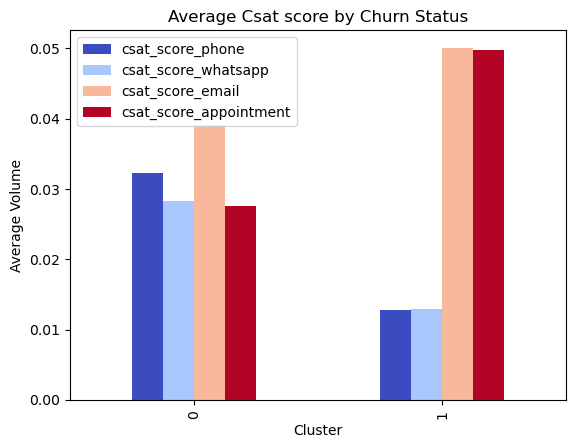

In [56]:
# CSAT Score Distributions
plt.figure(figsize=(10, 30))
df.groupby('Cluster')[['csat_score_phone', 'csat_score_whatsapp','csat_score_email','csat_score_appointment']].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average Csat score by Churn Status')
plt.ylabel('Average Volume')
plt.show()

This shows that customers in class 1 are often use email and make appointment to the bank (2 instruments that are related to work) which indicates they are high value customers than everyday customers in class 0.

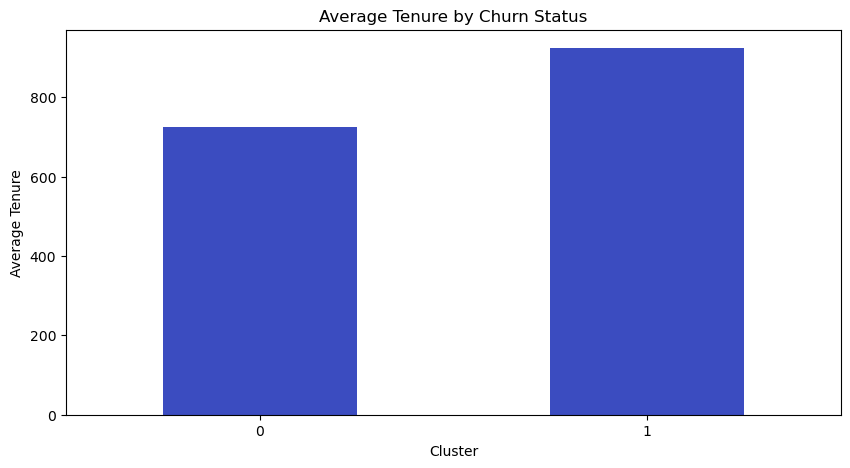

In [58]:
plt.figure(figsize=(10, 5))
df.groupby('Cluster')['tenure'].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average Tenure by Churn Status')
plt.ylabel('Average Tenure')
plt.xticks(rotation=0)
plt.show()

Customers in class 1 stay with the bank longer than customers in class 0

<Figure size 1000x500 with 0 Axes>

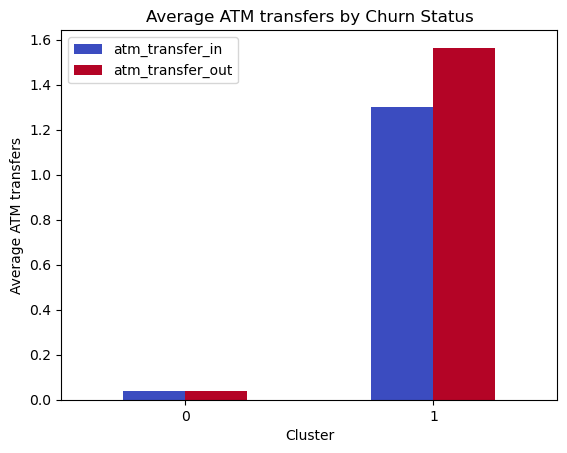

In [60]:
plt.figure(figsize=(10, 5))
df.groupby('Cluster')[['atm_transfer_in', 'atm_transfer_out']].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average ATM transfers by Churn Status')
plt.ylabel('Average ATM transfers')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

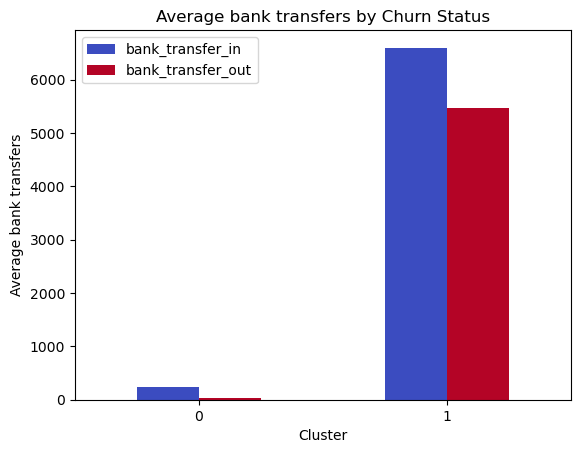

In [61]:
plt.figure(figsize=(10, 5))
df.groupby('Cluster')[['bank_transfer_in', 'bank_transfer_out']].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average bank transfers by Churn Status')
plt.ylabel('Average bank transfers')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

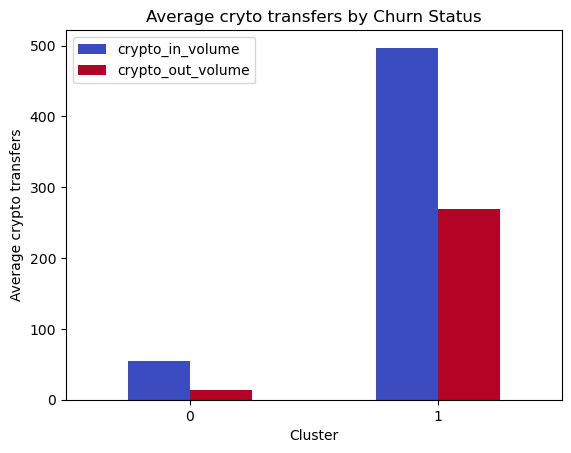

In [62]:
plt.figure(figsize=(10, 5))
df.groupby('Cluster')[['crypto_in_volume', 'crypto_out_volume']].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average cryto transfers by Churn Status')
plt.ylabel('Average crypto transfers')
plt.xticks(rotation=0)
plt.show()

Customers in class 1 have more transactions in all aspect than customers in class 0

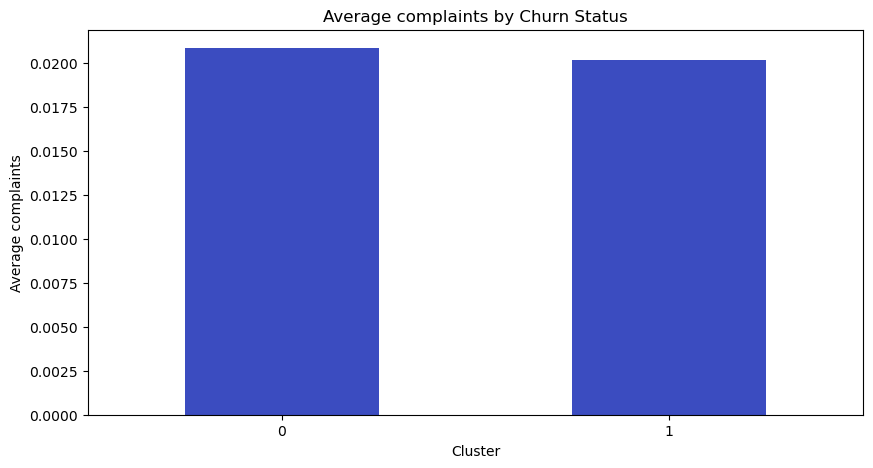

In [64]:
plt.figure(figsize=(10, 5))
df.groupby('Cluster')['complaints'].mean().plot(kind='bar', colormap='coolwarm')
plt.title('Average complaints by Churn Status')
plt.ylabel('Average complaints')
plt.xticks(rotation=0)
plt.show()

Customers in class 0 have slighly higher number of complaints than customers in class 1.

With all the analysis above, it is safe to be sure that class 0 will likely churn and class 1 will not.

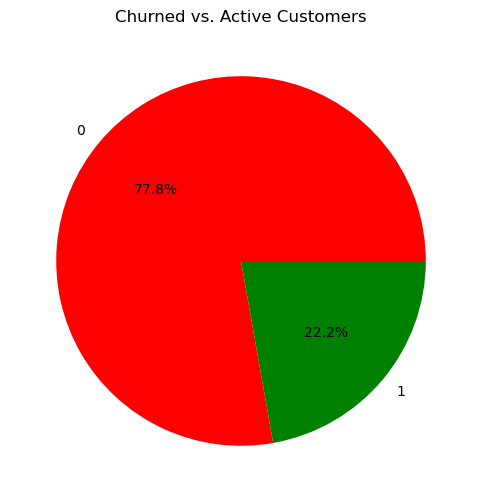

In [67]:
# Pie Chart - Churn Distribution
plt.figure(figsize=(6, 6))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Churned vs. Active Customers')
plt.ylabel('')
plt.show()

From this we can say that number of customers who will walk away from the bank is significantly higher than the number of customers who will not

In [69]:
df = df.rename(columns = {'Cluster':'Churned'})
df.columns

Index(['customer_id', 'interest_rate', 'atm_transfer_in', 'atm_transfer_out',
       'bank_transfer_in', 'bank_transfer_out', 'crypto_in', 'crypto_out',
       'bank_transfer_in_volume', 'bank_transfer_out_volume',
       'crypto_in_volume', 'crypto_out_volume', 'complaints', 'tenure',
       'from_competitor', 'churn_due_to_fraud', 'model_predicted_fraud',
       'touch_point_phone', 'touch_point_whatsapp', 'touch_point_email',
       'touch_point_appointment', 'csat_score_phone', 'csat_score_whatsapp',
       'csat_score_email', 'csat_score_appointment', 'country_encoded',
       'state_encoded', 'year_of_birth', 'job_encoded', 'Churned'],
      dtype='object')

# Now we need to identify customers from which countries and states that will likely to churn, which job categories, which generations

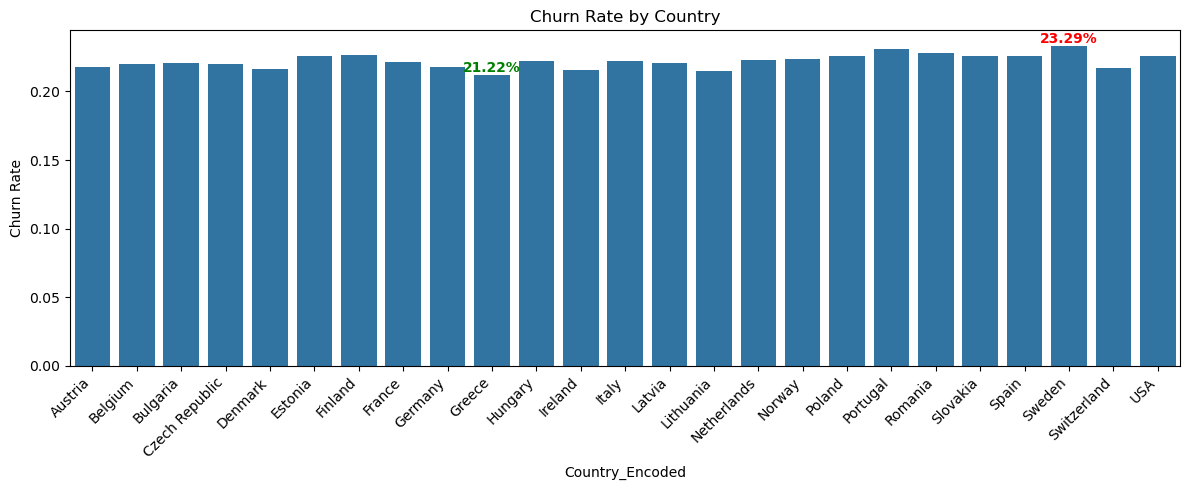

In [71]:
country_map = {idx: country for idx, country in enumerate(sorted(countries))}
def plot_churn_rate(df, column, title, category_map):
    churn_rates = df.groupby(column)["Churned"].mean()

    max_index = churn_rates.idxmax()
    min_index = churn_rates.idxmin()

    fig, ax = plt.subplots(figsize=(12, 5))

    sns.barplot(x=churn_rates.index, y=churn_rates.values, ax=ax)
    ax.set_xticks(range(len(churn_rates.index)))
    ax.set_xticklabels([category_map[idx] for idx in churn_rates.index], rotation=45, ha="right")
    ax.set_xlabel(column.title())
    ax.set_ylabel("Churn Rate")
    ax.set_title(title)

    # Annotate highest and lowest bars
    plt.text(max_index, churn_rates[max_index], f"{churn_rates[max_index]:.2%}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
    plt.text(min_index, churn_rates[min_index]+0.01, f"{churn_rates[min_index]:.2%}", 
             ha='center', va='top', fontsize=10, fontweight='bold', color='green')

    plt.tight_layout()
    plt.show()

# Plot churn rate by country
plot_churn_rate(df, "country_encoded", "Churn Rate by Country", country_map)

1. Overview:
- The churn rate remains **fairly consistent** across most countries, with values clustering around **21–23%**.  
- There are **no extreme outliers**, suggesting that churn behavior does not significantly vary across different regions.
- The churn rate does **not vary drastically**, meaning **geographical location alone might not be a strong predictor** of churn.
2. Highest churn rate
- Sweden has the **highest churn rate**
- Investigating **customer feedback or service issues** in Sweden might provide insights into why churn is higher.
3. Lowest churn rate
- Greece has the **lowest churn rate**, which suggests **better customer retention** compared to other countries.  
- Potential reasons might include **better customer service, stronger brand loyalty, or fewer alternatives in the market.**  

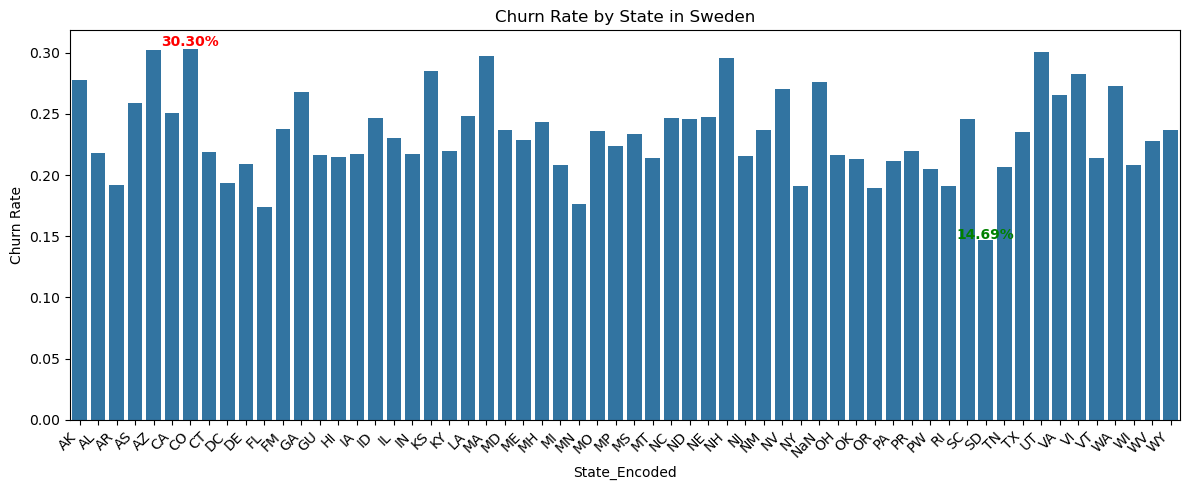

In [73]:
state_map = {idx: state for idx, state in enumerate(sorted(['NaN' if x is np.nan else x for x in states]))}
plot_churn_rate(df[df['country_encoded']==22],"state_encoded","Churn Rate by State in Sweden",state_map)

In [74]:
plot_churn_rate(df[df['country_encoded']==9],"state_encoded","Churn Rate by State in Greece",state_map)

The question is: "What has Greece done right to keep the lowest churn rate and what could Sweden improve to low the churn rate?"

In [76]:
# Filter for Sweden and Greece
filtered_df = df[df['country_encoded'].isin([22, 9])]
# Create country mapping for better readability
country_mapping = {9: 'Greece', 22: 'Sweden'}
filtered_df.loc[:, 'country_name'] = filtered_df['country_encoded'].map(country_mapping)
# Group by churn status and country, then calculate average complaints
avg_complaints = filtered_df.groupby(['Churned', 'country_name'])['complaints'].mean().reset_index()
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Churned', y='complaints', hue='country_name', data=avg_complaints)
# Titles and labels
plt.title('Average Complaints by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average Complaints', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)
# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23528\1430816115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'country_name'] = filtered_df['country_encoded'].map(country_mapping)


As we can see on average, many customers who identified as churn in Sweden have significantly more complaints than in Greece

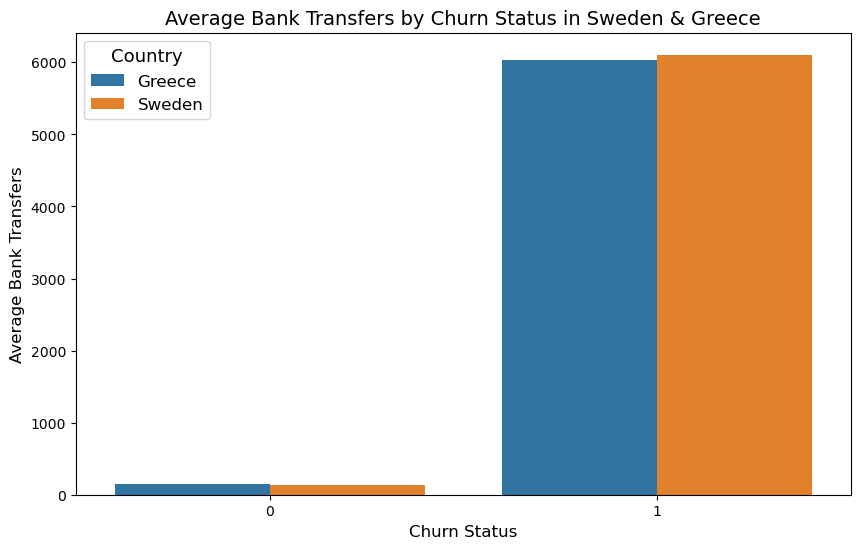

In [78]:
# Group by churn status and country, then calculate average bank transfers
avg_bank_transfers = filtered_df.groupby(['Churned', 'country_name'])[['bank_transfer_in', 'bank_transfer_out']].mean().reset_index()

# Reshape the dataframe for Seaborn
avg_bank_transfers_melted = avg_bank_transfers.melt(id_vars=['Churned', 'country_name'], 
                                                     var_name='Transfer Type', 
                                                     value_name='Average Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Churned', y='Average Amount', hue='country_name', data=avg_bank_transfers_melted, errorbar=None)

# Titles and labels
plt.title('Average Bank Transfers by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average Bank Transfers', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)

# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

In [79]:
# Group by churn status and country, then calculate average ATM transfers
avg_atm_transfers = filtered_df.groupby(['Churned', 'country_name'])[['atm_transfer_in', 'atm_transfer_out']].mean().reset_index()

# Reshape the dataframe for Seaborn
avg_atm_transfers_melted = avg_atm_transfers.melt(id_vars=['Churned', 'country_name'], 
                                                     var_name='Transfer Type', 
                                                     value_name='Average Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Churned', y='Average Amount', hue='country_name', data=avg_atm_transfers_melted, errorbar=None)

# Titles and labels
plt.title('Average ATM Transfers by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average ATM Transfers', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)

# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

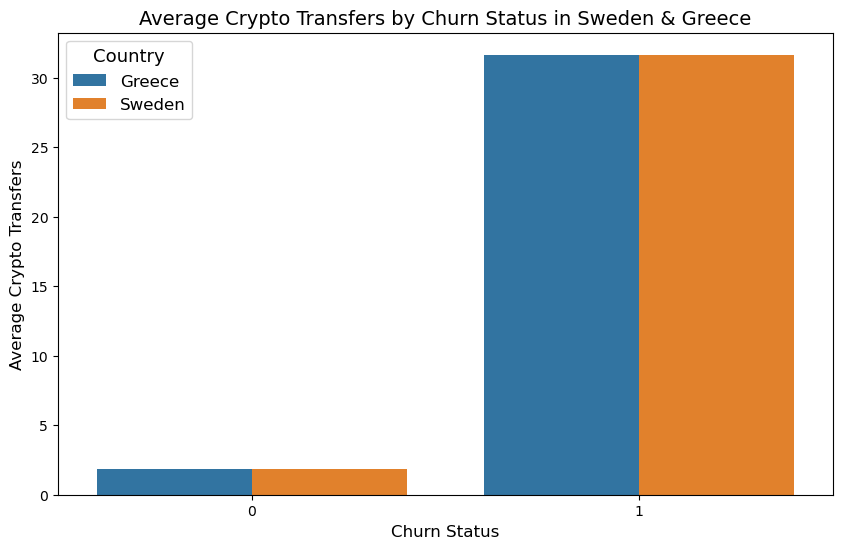

In [80]:
# Group by churn status and country, then calculate average crypto transfers
avg_crypto_transfers = filtered_df.groupby(['Churned', 'country_name'])[['crypto_in', 'crypto_out']].mean().reset_index()

# Reshape the dataframe for Seaborn
avg_crypto_transfers_melted = avg_crypto_transfers.melt(id_vars=['Churned', 'country_name'], 
                                                     var_name='Transfer Type', 
                                                     value_name='Average Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Churned', y='Average Amount', hue='country_name', data=avg_crypto_transfers_melted, errorbar=None)

# Titles and labels
plt.title('Average Crypto Transfers by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average Crypto Transfers', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)

# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

In [81]:
avg_bank_transfers = filtered_df.groupby(['Churned', 'country_name'])[['bank_transfer_in_volume', 'bank_transfer_out_volume']].mean().reset_index()

# Reshape the dataframe for Seaborn
avg_bank_transfers_melted = avg_bank_transfers.melt(id_vars=['Churned', 'country_name'], 
                                                     var_name='Type', 
                                                     value_name='Average Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Churned', y='Average Amount', hue='country_name', data=avg_bank_transfers_melted, errorbar=None)

# Titles and labels
plt.title('Average Bank Transfer Volume by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average Bank Transfer Volume', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)

# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

From 4 bar charts above, we can clearly see that customers who do not churn in Greece are more active than those in Sweden; on the contrary, customers who are flagged as churned in Sweden are more active than those in Greece.

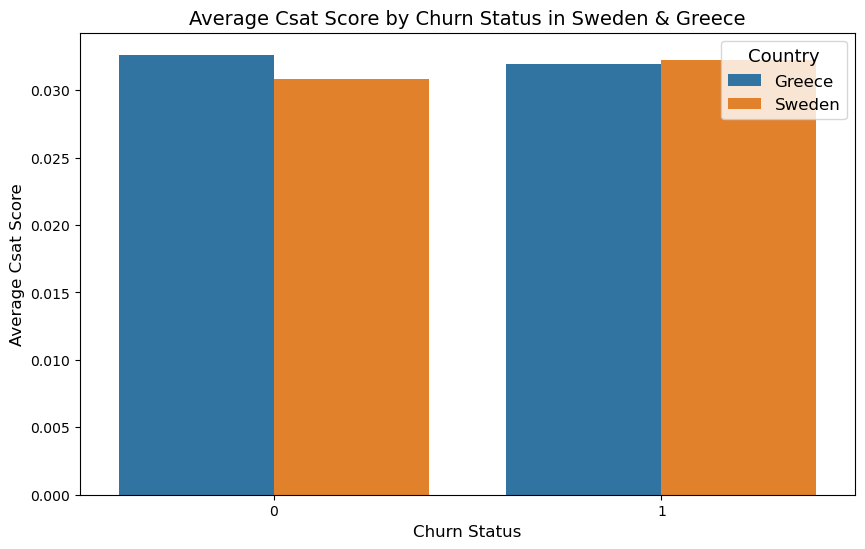

In [83]:
avg_csat_transfers = filtered_df.groupby(['Churned', 'country_name'])[['csat_score_phone', 'csat_score_whatsapp','csat_score_email', 'csat_score_appointment']].mean().reset_index()

# Reshape the dataframe for Seaborn
avg_csat_transfers_melted = avg_csat_transfers.melt(id_vars=['Churned', 'country_name'], 
                                                     var_name='Type', 
                                                     value_name='Average Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Churned', y='Average Score', hue='country_name', data=avg_csat_transfers_melted, errorbar=None)

# Titles and labels
plt.title('Average Csat Score by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average Csat Score', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)

# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

Sweden appears to have slightly lower CSAT scores for churned customers compared to Greece. This may indicate that Swedish customers who churn tend to be less satisfied than Greek customers who churn.

For customers who did not churn, the CSAT scores for Sweden and Greece are nearly identical. This implies that satisfaction among retained customers is similar in both countries.

In [85]:
avg_touchpoint_transfers = filtered_df.groupby(['Churned', 'country_name'])[['touch_point_phone', 'touch_point_whatsapp', 'touch_point_email', 'touch_point_appointment']].mean().reset_index()

# Reshape the dataframe for Seaborn
avg_touchpoint_transfers_melted = avg_touchpoint_transfers.melt(id_vars=['Churned', 'country_name'], 
                                                     var_name='Type', 
                                                     value_name='Average Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Churned', y='Average Amount', hue='country_name', data=avg_touchpoint_transfers_melted, errorbar=None)

# Titles and labels
plt.title('Average Touchpoints by Churn Status in Sweden & Greece', fontsize=14)
plt.ylabel('Average Touchpoints', fontsize=12)
plt.xlabel('Churn Status', fontsize=12)

# Show the plot
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.show()

Customers who are flagged as churned in Sweden are getting reach out more than those in Greece, however, it is the other way around with customers who are flagged as not churned.

### **Key Conclusions & Actions**  

1️⃣ **Complaints & Churn**  
- **Swedish churned customers have more complaints than Greek ones.**  
- => Improve customer service & proactively resolve issues in Sweden.  

2️⃣ **Activity & Churn Patterns**  
- **Greek non-churned customers are more active; Swedish churned customers are more active.**  
- => Boost engagement for retained Swedish customers & analyze why active ones still churn.  

3️⃣ **CSAT & Retention**  
- **Swedish churned customers have lower satisfaction than Greek ones; non-churned CSAT is similar.**  
- => Address dissatisfaction in Sweden with better customer experience & expectation management.  

4️⃣ **Outreach Strategy**  
- **Churned Swedes receive more outreach than Greeks; opposite for non-churned.**  
- => Shift focus to proactive retention in Sweden rather than reactive outreach.  

## Churn rate by job categories

In [89]:
filtered_df.columns

Index(['customer_id', 'interest_rate', 'atm_transfer_in', 'atm_transfer_out',
       'bank_transfer_in', 'bank_transfer_out', 'crypto_in', 'crypto_out',
       'bank_transfer_in_volume', 'bank_transfer_out_volume',
       'crypto_in_volume', 'crypto_out_volume', 'complaints', 'tenure',
       'from_competitor', 'churn_due_to_fraud', 'model_predicted_fraud',
       'touch_point_phone', 'touch_point_whatsapp', 'touch_point_email',
       'touch_point_appointment', 'csat_score_phone', 'csat_score_whatsapp',
       'csat_score_email', 'csat_score_appointment', 'country_encoded',
       'state_encoded', 'year_of_birth', 'job_encoded', 'Churned',
       'country_name'],
      dtype='object')

In [90]:
job_category_map = {idx: category for idx, category in enumerate(sorted(list(job_category.unique())))}
job_category_map

{0: 'Education',
 1: 'Engineering',
 2: 'Finance',
 3: 'Healthcare',
 4: 'IT',
 5: 'Law',
 6: 'Media',
 7: 'Other'}

In [91]:
plot_churn_rate(df,'job_encoded','Churn Rate by Job Category',job_category_map)

The churn rates across other job categories appear relatively similar, with minor variations.
- IT has the highest churn rate (23.72%), indicating that IT professionals are more likely to leave.
- Education has the lowest churn rate (21.88%), suggesting higher retention among educators.

## Churn rate by generation

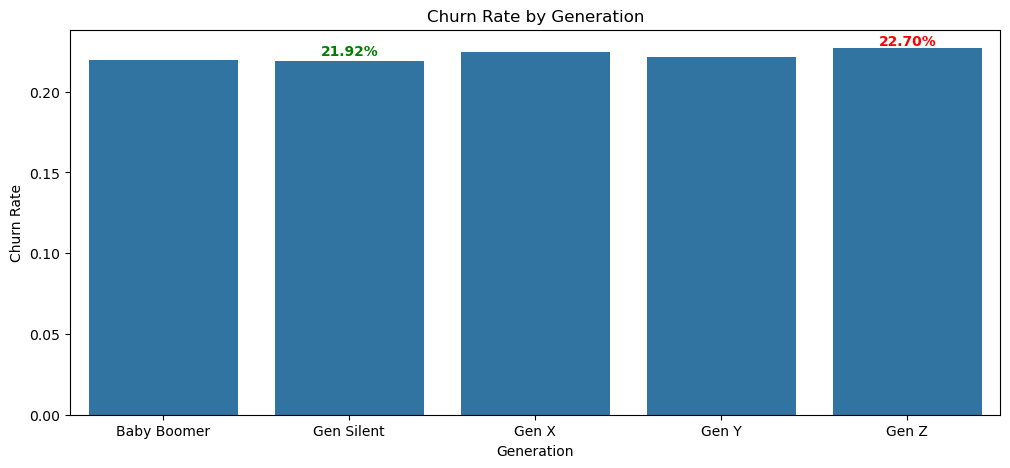

In [94]:
def generation(val):
    if 1925 <= val <= 1945:
        return "Gen Silent"
    elif 1946 <= val <= 1964:
        return "Baby Boomer"
    elif 1965 <= val <= 1980:
        return "Gen X"
    elif 1981 <= val <= 1996:
        return "Gen Y"
    elif 1997 <= val <= 2012:
        return "Gen Z"
    else:
        return "Others"
df['generation'] = df['year_of_birth'].apply(generation)
churn_rates = df.groupby('generation')["Churned"].mean()

max_index = churn_rates.idxmax()
min_index = churn_rates.idxmin()

fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(x=churn_rates.index, y=churn_rates.values, ax=ax)
ax.set_xlabel("Generation")
ax.set_ylabel("Churn Rate")
ax.set_title("Churn Rate by Generation")

# Annotate highest and lowest bars
plt.text(max_index, churn_rates[max_index], f"{churn_rates[max_index]:.2%}", 
         ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
plt.text(min_index, churn_rates[min_index]+0.01, f"{churn_rates[min_index]:.2%}", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='green')

plt.show()

- Gen Z has the highest churn rate (22.70%) (marked in red), indicating that younger customers are more likely to leave.
- Gen Silent has the lowest churn rate (21.92%) (marked in green), meaning older customers tend to be more loyal.
- Other generations (Baby Boomers, Gen X, and Gen Y) have similar churn rates, slightly above Gen Silent but below Gen Z.

# Build Machine learning models to predict churn customer

## Feature Engineering

In [98]:
df['Churned'] = df['Churned'].map({0:'churned', 1:'not churned'})
df['Churned']

date
2019-09-29    churned
2019-09-30    churned
2019-03-05    churned
2019-03-06    churned
2019-03-07    churned
               ...   
2023-12-31    churned
2023-12-31    churned
2023-12-31    churned
2023-12-31    churned
2023-12-31    churned
Name: Churned, Length: 1867263, dtype: object

In [99]:
df['Churned'] = df['Churned'].map({'churned':1, 'not churned':0})
df['Churned']

date
2019-09-29    1
2019-09-30    1
2019-03-05    1
2019-03-06    1
2019-03-07    1
             ..
2023-12-31    1
2023-12-31    1
2023-12-31    1
2023-12-31    1
2023-12-31    1
Name: Churned, Length: 1867263, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1867263 entries, 2019-09-29 to 2023-12-31
Data columns (total 31 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   customer_id               int64  
 1   interest_rate             float64
 2   atm_transfer_in           int64  
 3   atm_transfer_out          int64  
 4   bank_transfer_in          int64  
 5   bank_transfer_out         int64  
 6   crypto_in                 int64  
 7   crypto_out                int64  
 8   bank_transfer_in_volume   float64
 9   bank_transfer_out_volume  float64
 10  crypto_in_volume          float64
 11  crypto_out_volume         float64
 12  complaints                int64  
 13  tenure                    int64  
 14  from_competitor           int64  
 15  churn_due_to_fraud        int64  
 16  model_predicted_fraud     int64  
 17  touch_point_phone         int64  
 18  touch_point_whatsapp      int64  
 19  touch_point_email         int64  
 20  touch_poi

In [101]:
df.isnull().sum()

customer_id                 0
interest_rate               0
atm_transfer_in             0
atm_transfer_out            0
bank_transfer_in            0
bank_transfer_out           0
crypto_in                   0
crypto_out                  0
bank_transfer_in_volume     0
bank_transfer_out_volume    0
crypto_in_volume            0
crypto_out_volume           0
complaints                  0
tenure                      0
from_competitor             0
churn_due_to_fraud          0
model_predicted_fraud       0
touch_point_phone           0
touch_point_whatsapp        0
touch_point_email           0
touch_point_appointment     0
csat_score_phone            0
csat_score_whatsapp         0
csat_score_email            0
csat_score_appointment      0
country_encoded             0
state_encoded               0
year_of_birth               0
job_encoded                 0
Churned                     0
generation                  0
dtype: int64

In [102]:
df = df.drop(columns = 'generation')
correlations = df.corr()['Churned'].abs().sort_values(ascending=False)
print(correlations)  # Look for high correlations (>0.9)

Churned                     1.000000
crypto_in                   0.989028
bank_transfer_out           0.942500
bank_transfer_out_volume    0.941396
crypto_out_volume           0.934549
bank_transfer_in_volume     0.928907
crypto_out                  0.927296
crypto_in_volume            0.913993
bank_transfer_in            0.866233
tenure                      0.088124
touch_point_appointment     0.056704
touch_point_phone           0.051951
touch_point_whatsapp        0.044948
interest_rate               0.031713
atm_transfer_out            0.028958
atm_transfer_in             0.026911
touch_point_email           0.026420
csat_score_appointment      0.019496
csat_score_phone            0.018611
csat_score_whatsapp         0.015403
customer_id                 0.014213
csat_score_email            0.008551
country_encoded             0.005649
year_of_birth               0.004917
from_competitor             0.002531
model_predicted_fraud       0.001905
state_encoded               0.001766
c

Several features are highly correlated with `Churned` (correlation > 0.9), which can cause the model to cheat by relying on post-churn or directly related data.

In [104]:
df = df.drop(columns = [
    'crypto_in', 'bank_transfer_out', 'bank_transfer_out_volume',
    'crypto_out_volume', 'bank_transfer_in_volume', 'crypto_out',
    'crypto_in_volume', 'bank_transfer_in'
])

In [105]:
X = df.drop(columns = 'Churned')
y = df['Churned']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Machine Learning model

In [107]:
# Define base weak learner
weak_learner = DecisionTreeClassifier(max_depth=1)
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(estimator=weak_learner, n_estimators=100, learning_rate=1.0, algorithm='SAMME', random_state=42),
    # "SVM": SVC(probability=True),  # Enable probability for AUC Score
    # "Naïve Bayes": GaussianNB()
}

# Train & Evaluate Models
results = {}
for name, model in models.items():
    start_time = time.time()
    # Use scaled features for models that require it
    X_train_used, X_test_used = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "KNN", "SVM", "Naïve Bayes"] else (X_train, X_test)
    
    model.fit(X_train_used, y_train)
    y_pred = model.predict(X_test_used)
    y_proba = model.predict_proba(X_test_used)[:, 1] if hasattr(model, "predict_proba") else y_pred  # Some models don't have predict_proba

    results[name] = {
        "Model": model,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    end_time = time.time()
    print(f"{name} took {end_time - start_time:.2f}s to complete") 

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)

Logistic Regression took 4.42s to complete
Decision Tree took 28.49s to complete
Random Forest took 907.41s to complete
XGBoost took 10.46s to complete
AdaBoost took 276.08s to complete
                                                                 Model  \
Logistic Regression                               LogisticRegression()   
Decision Tree                                 DecisionTreeClassifier()   
Random Forest        (DecisionTreeClassifier(max_features='sqrt', r...   
XGBoost              XGBClassifier(base_score=None, booster=None, c...   
AdaBoost             (DecisionTreeClassifier(max_depth=1, random_st...   

                     Accuracy Precision    Recall   ROC-AUC  
Logistic Regression  0.778208  0.779225  0.997194  0.599871  
Decision Tree        0.945034  0.965268  0.963971  0.921455  
Random Forest        0.956926  0.956963  0.989066  0.988244  
XGBoost              0.783751  0.785637  0.992637  0.761744  
AdaBoost             0.777294  0.777294       1.0  0.671015

<Figure size 1200x600 with 0 Axes>

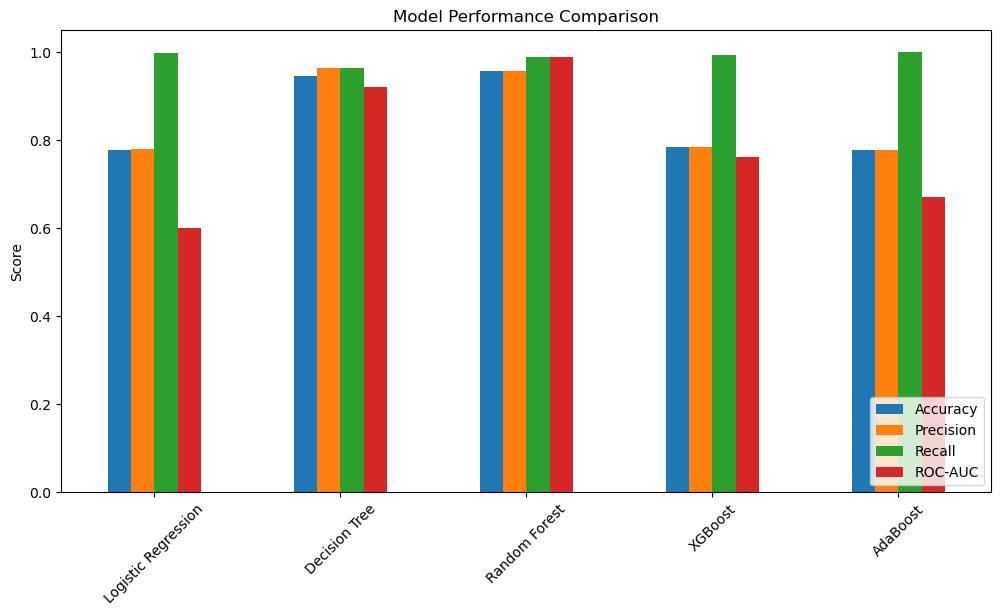

In [108]:
# Plot Performance Comparison
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

Based on the results, Random Forest is the best choice because:
- Highest Accuracy (0.9569) => Most correct predictions overall.
- High Precision (0.9569) => Fewer false positives.
- High Recall (0.9891) => Captures most of the churned customers.
- Highest ROC-AUC (0.9882) => Best at distinguishing churned vs. non-churned customers.

In [187]:
best_model = results['Random Forest']['Model']
best_model

RandomForestClassifier(random_state=42)

# Preprocessing data function

In [206]:
touchpoints = ['phone','whatsapp','email','appointment']
job_categories = {
    'Engineering': ['engineer', 'technician', 'mechanic', 'developer'],
    'Healthcare': ['doctor', 'nurse', 'pharmacist', 'therapist'],
    'Finance': ['accountant', 'banker', 'trader', 'financial'],
    'Education': ['teacher', 'lecturer', 'professor'],
    'IT': ['developer', 'software', 'IT', 'programmer'],
    'Law': ['lawyer', 'solicitor', 'barrister'],
    'Media': ['journalist', 'producer', 'editor', 'broadcaster'],
}
# Transform touchpoints column
def count_tp(df):
    for tp in touchpoints:
        tps = []
        for val in df['touchpoints']:
            tps.append(list(val).count(tp))
        df[f'touch_point_{tp}'] = tps
    df = df.drop(columns = 'touchpoints')
    return df
# Transform csat_scores column
def csat_score(df):
    for tp in touchpoints:
        scores = []
        for val in df['csat_scores']:
            scores.append(val[tp] if val[tp] is not None else 0)
        df[f'csat_score_{tp}'] = scores
    df = df.drop(columns = 'csat_scores')
    return df
# Function to classify job titles
def classify_job(title):
    title = title.lower()
    for category, keywords in job_categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'
def transform(df):
    # Transform data type of `date_of_birth` column
    df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
    # Transform boolean columns
    bool_col = []
    for col in list(df.columns):
        if df[col].dtype == 'bool':
            bool_col.append(col)
    for col in bool_col:
        df[col] = [int(val) for val in df[col]]
    # Transform object columns
    object_col = []
    for col in list(df.columns):
        if df[col].dtype == 'object':
            object_col.append(col)
            
    df = count_tp(df)
    
    df = csat_score(df)
    
    # Use regex to extract parts of the address
    df[['street_address', 'city', 'state', 'zip_code', 'country_1']] = df['address'].str.extract(
        r'^(.*)\n(.*),\s([A-Z]{2})\s(\d{5})\s(.+)$'
    )
    df = df.drop(columns=['address','country_1','zip_code'])
    df = df.drop(columns = 'street_address')
    df['country_encoded'] = country_encoder.transform(df['country'])
    df['state_encoded'] = state_encoder.transform(df['state'])
    df = df.drop(columns = ['state','country'])
    df = df.drop(columns = ['name','city'])

    # Extract year of birth of customer
    df['year_of_birth'] = df['date_of_birth'].dt.year
    df = df.drop(columns = 'date_of_birth')
    # Set `date` as index
    df = df.set_index('date')
    
    df['job_category'] = df['job'].apply(classify_job)
    df = df.drop(columns = 'job')

    df['job_encoded'] = job_encoded.transform(df['job_category'])
    df = df.drop(columns = 'job_category')
    df = df.drop(columns = 'Id')
    
    return df

# Apply preprocessing function to a new dataset and the best machine learning model to it to predict churn customers on that dataset

In [218]:
test_data = pd.read_parquet("test.parquet")
test_data.head()

Id  customer_id  interest_rate                name         country  \
0  6187320        68714            3.0   Shannon Rodriguez         Belgium   
1  6187321        90102            3.0  Michael Hutchinson  Czech Republic   
2  6187322       106090            3.0        Lisa Johnson       Lithuania   
3  6187323        90092            3.0    Kimberly Bennett         Austria   
4  6187324        90083            3.0    Holly Perkins MD         Belgium   

  date_of_birth                                            address       date  \
0    1988-02-03  68295 Young Cliff Suite 989\nWilsonland, NC 46... 2024-01-01   
1    1968-08-01           USCGC Knapp\nFPO AA 87355 Czech Republic 2024-01-01   
2    1970-04-10  1768 Timothy Common\nSouth Kyleborough, SD 872... 2024-01-01   
3    1942-11-28  7518 David River\nWest Stevenborough, AL 26963... 2024-01-01   
4    1971-09-11  6667 Laura Motorway Apt. 513\nOrtizhaven, PA 4... 2024-01-01   

   atm_transfer_in  atm_transfer_out  ...  crypto_out_volume  complaints  \
0                0                 0  ...          20.922171           0   
1                0                 0  ...           1.802211           0   
2                0                 0  ...          11.712590           0   
3                0                 0  ...          15.850617           0   
4                0                 0  ...         245.976563           2   

                      touchpoints  \
0  [whatsapp, whatsapp, whatsapp]   
1                              []   
2                              []   
3                              []   
4                              []   

                                         csat_scores  tenure  from_competitor  \
0  {'appointment': None, 'email': None, 'phone': ...    1122            False   
1  {'appointment': None, 'email': None, 'phone': ...     399            False   
2  {'appointment': None, 'email': None, 'phone': ...       3            False   
3  {'appointment': None, 'email': None, 'phone': ...     400            False   
4  {'appointment': None, 'email': None, 'phone': ...     400            False   

                         job  churn_due_to_fraud    Usage  \
0  Psychologist, educational               False  Private   
1      Forensic psychologist               False  Private   
2    General practice doctor               False  Private   
3         Surveyor, quantity               False  Private   
4       Intelligence analyst               False  Private   

  model_predicted_fraud  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 27 columns]

In [219]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360472 entries, 0 to 1360471
Data columns (total 27 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Id                        1360472 non-null  int64         
 1   customer_id               1360472 non-null  int64         
 2   interest_rate             1360472 non-null  float64       
 3   name                      1360472 non-null  object        
 4   country                   1360472 non-null  object        
 5   date_of_birth             1360472 non-null  object        
 6   address                   1360472 non-null  object        
 7   date                      1360472 non-null  datetime64[ns]
 8   atm_transfer_in           1360472 non-null  int64         
 9   atm_transfer_out          1360472 non-null  int64         
 10  bank_transfer_in          1360472 non-null  int64         
 11  bank_transfer_out         1360472 non-null  int64 

In [220]:
# Apply preprocessing function
test_data = transform(test_data)
display(test_data.head())
print(test_data.info())

customer_id  interest_rate  atm_transfer_in  atm_transfer_out  \
date                                                                        
2024-01-01        68714            3.0                0                 0   
2024-01-01        90102            3.0                0                 0   
2024-01-01       106090            3.0                0                 0   
2024-01-01        90092            3.0                0                 0   
2024-01-01        90083            3.0                0                 0   

            bank_transfer_in  bank_transfer_out  crypto_in  crypto_out  \
date                                                                     
2024-01-01               532                  2          1           1   
2024-01-01                 2                  5          1           1   
2024-01-01                 5                  2          6           5   
2024-01-01               461                  2          1           1   
2024-01-01              5315               4591         54          14   

            bank_transfer_in_volume  bank_transfer_out_volume  ...  \
date                                                           ...   
2024-01-01               894.155487                149.683689  ...   
2024-01-01              1301.200834                 24.784818  ...   
2024-01-01                22.109319                 11.548979  ...   
2024-01-01               808.678384                108.496368  ...   
2024-01-01              7185.175214               7609.664635  ...   

            touch_point_email  touch_point_appointment  csat_score_phone  \
date                                                                       
2024-01-01                  0                        0               0.0   
2024-01-01                  0                        0               0.0   
2024-01-01                  0                        0               0.0   
2024-01-01                  0                        0               0.0   
2024-01-01                  0                        0               0.0   

            csat_score_whatsapp  csat_score_email  csat_score_appointment  \
date                                                                        
2024-01-01                  5.0               0.0                     0.0   
2024-01-01                  0.0               0.0                     0.0   
2024-01-01                  0.0               0.0                     0.0   
2024-01-01                  0.0               0.0                     0.0   
2024-01-01                  0.0               0.0                     0.0   

           country_encoded  state_encoded  year_of_birth  job_encoded  
date                                                                   
2024-01-01               1             32           1988            7  
2024-01-01               3             59           1968            7  
2024-01-01              14             48           1970            3  
2024-01-01               0              1           1942            7  
2024-01-01               1             43           1971            7  

[5 rows x 30 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360472 entries, 2024-01-01 to 2026-12-31
Data columns (total 30 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   customer_id               1360472 non-null  int64  
 1   interest_rate             1360472 non-null  float64
 2   atm_transfer_in           1360472 non-null  int64  
 3   atm_transfer_out          1360472 non-null  int64  
 4   bank_transfer_in          1360472 non-null  int64  
 5   bank_transfer_out         1360472 non-null  int64  
 6   crypto_in                 1360472 non-null  int64  
 7   crypto_out                1360472 non-null  int64  
 8   bank_transfer_in_volume   1360472 non-null  float64
 9   bank_transfer_out_volume  1360472 non-null  float64
 10  crypto_in_volume          1360472 non-null  float64
 11  crypto_out_volume         1360472 non-null  float64
 12  complaints                1360472 non-null  int64  
 13  tenure      

In [221]:
test_data = test_data.drop(columns = 'Usage')
test_data_cleaned = test_data.drop(columns = [
    'crypto_in', 'bank_transfer_out', 'bank_transfer_out_volume',
    'crypto_out_volume', 'bank_transfer_in_volume', 'crypto_out',
    'crypto_in_volume', 'bank_transfer_in'
])
predict_y = best_model.predict(test_data_cleaned)

In [227]:
predict_y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [241]:
test = pd.read_parquet("test.parquet")
record_id = test['Id']

In [245]:
predict_proba = best_model.predict_proba(test_data_cleaned)
predict_proba

array([[0.19, 0.81],
       [0.02, 0.98],
       [0.06, 0.94],
       ...,
       [0.  , 1.  ],
       [0.63, 0.37],
       [0.14, 0.86]])

In [249]:
results_csv = pd.DataFrame({'Id':record_id, 'Probability to churn':predict_proba[:, 1], 'Prediction': predict_y})
results_csv.head()

Id  Probability to churn  Prediction
0  6187320                  0.81           1
1  6187321                  0.98           1
2  6187322                  0.94           1
3  6187323                  0.56           1
4  6187324                  0.87           1

In [251]:
results_csv['Prediction'] = results_csv['Prediction'].map({0:'Not churn',1:'Churn'})
results_csv.head()

Id  Probability to churn Prediction
0  6187320                  0.81      Churn
1  6187321                  0.98      Churn
2  6187322                  0.94      Churn
3  6187323                  0.56      Churn
4  6187324                  0.87      Churn

In [253]:
results_csv[results_csv['Prediction']=='Not churn']

Id  Probability to churn Prediction
14       6187334                  0.12  Not churn
15       6187335                  0.36  Not churn
24       6187344                  0.21  Not churn
29       6187349                  0.09  Not churn
37       6187357                  0.03  Not churn
...          ...                   ...        ...
1360450  7547770                  0.02  Not churn
1360456  7547776                  0.26  Not churn
1360463  7547783                  0.20  Not churn
1360465  7547785                  0.01  Not churn
1360470  7547790                  0.37  Not churn

[76391 rows x 3 columns]

In [255]:
results_csv[results_csv['Prediction']=='Churn']

Id  Probability to churn Prediction
0        6187320                  0.81      Churn
1        6187321                  0.98      Churn
2        6187322                  0.94      Churn
3        6187323                  0.56      Churn
4        6187324                  0.87      Churn
...          ...                   ...        ...
1360466  7547786                  0.99      Churn
1360467  7547787                  0.95      Churn
1360468  7547788                  0.85      Churn
1360469  7547789                  1.00      Churn
1360471  7547791                  0.86      Churn

[1284081 rows x 3 columns]

In [257]:
# Write to .csv file
results_csv.to_csv("final result.csv", index=False)